# 1) Installation of essential Python libraries
- opencv-python: Used for image and video processing.
- scikit-image: Provides algorithms for image manipulation and analysis.
- keras: A high-level library for building and training deep learning models.
- tensorflow: A low-level library for building and training machine learning models, often used together with Keras.
- pandas: Used for data manipulation and analysis in table or DataFrame format.
- scikit-learn: Offers tools for machine learning, including algorithms for classification, regression, clustering, etc.
- seaborn: A library for data visualization, built on top of matplotlib and integrated with pandas to create attractive statistical graphics.

These installations prepare the environment needed for performing data analysis and developing machine learning models.

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# 2) Importation library

In [2]:
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Visualization library (if needed)

# Data Analysis
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, f1_score

# Image Processing
import cv2
from skimage.io import imread
from skimage import exposure
from skimage.transform import resize
from skimage.feature import hog
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 3)Data Loading and Preprocessing:
Here we organize and analyze the dataset of images categorized into four classes: 'cloudy', 'desert', 'green_area', and 'water'. It defines functions to explore the dataset and display sample images. The explore_dataset function counts the total number of images and the number of images in each class. The display_images function visualizes a few sample images from each class by reading and converting them from BGR to RGB format. The script first calculates and prints the dataset statistics, then displays example images from each class.

Total size of dataset: 5631 images
Number of classes: 4
Number of images per class: {'cloudy': 1500, 'desert': 1131, 'green_area': 1500, 'water': 1500}


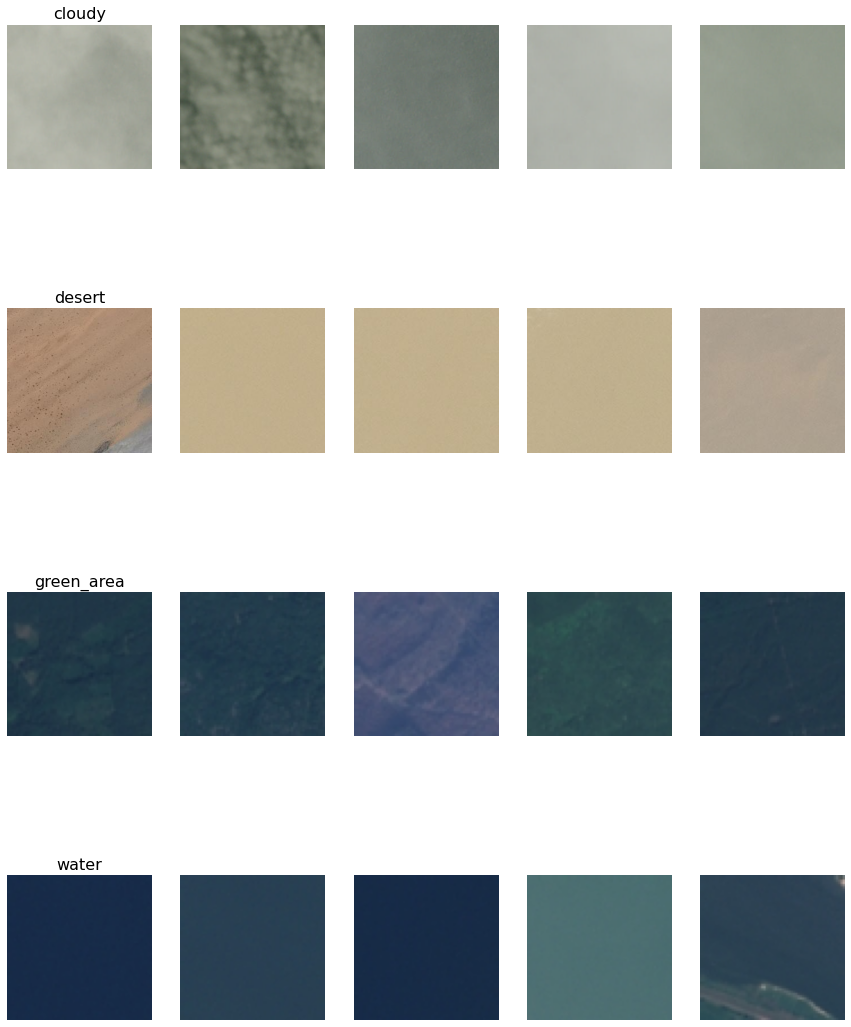

In [3]:
# Define the path to the dataset folder
data_folder_path = 'data'
# List of subdirectories representing different classes
subdirectories = ['cloudy', 'desert', 'green_area', 'water']

# Function to explore the dataset and count images in each class
def explore_dataset(base_path, subdirectories):
    total_images = 0
    class_counts = {}
    
    for subdir in subdirectories:
        subdir_path = os.path.join(base_path, subdir)
        # Count the number of '.jpg' files in the subdirectory
        file_count = len([f for f in os.listdir(subdir_path) if f.endswith('.jpg')])
        class_counts[subdir] = file_count
        total_images += file_count
    
    return total_images, class_counts

# Function to display a few sample images from each class
def display_images(base_path, subdirectories, num_images=5):
    fig, axes = plt.subplots(len(subdirectories), num_images, figsize=(15, 5 * len(subdirectories)))
    for i, subdir in enumerate(subdirectories):
        subdir_path = os.path.join(base_path, subdir)
        images = [f for f in os.listdir(subdir_path) if f.endswith('.jpg')][:num_images]
        for j, img_name in enumerate(images):
            img_path = os.path.join(subdir_path, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[i, j].imshow(image)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(subdir, fontsize=16)
    plt.show()

# Explore the dataset
total_images, class_counts = explore_dataset(data_folder_path, subdirectories)
print(f"Total size of dataset: {total_images} images")
print(f"Number of classes: {len(class_counts)}")
print(f"Number of images per class: {class_counts}")

# Display a few sample images from each class
display_images(data_folder_path, subdirectories)


## 3.1) Dataset structure
Here, we count the number of images (polygons) and the total number of pixels for each class. For each class, the code reads the images, counts the number of images and calculates the number of pixels by multiplying the height and width of each image. The results are stored in dictionaries and displayed as DataFrame pandas. This makes it possible to understand data distribution, check class balance and prepare data for subsequent analysis and modeling stages.

In [4]:
import os
import cv2
import pandas as pd
import numpy as np
from scipy import stats

# Define the path to your dataset
data_folder_path = 'data'

# List of class names (ensure these match the directory names in your dataset)
classes = ['cloudy', 'desert', 'green_area', 'water']

# Initialize dictionaries to store the number of polygons and pixels
num_polygons = {}
num_pixels = {}

# Iterate through each class
for class_name in classes:
    class_path = os.path.join(data_folder_path, class_name)
    # Get all image files in the class directory
    image_files = [f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')]
    
    # Number of polygons (images)
    num_polygons[class_name] = len(image_files)
    
    # Initialize pixel count for the class
    total_pixels = 0
    
    # Iterate through each image to count the pixels
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            total_pixels += image.shape[0] * image.shape[1]
    
    # Store the total number of pixels for the class
    num_pixels[class_name] = total_pixels

# Create a DataFrame to display the results
data = {
    'Class': classes,
    'Number of Polygons': [num_polygons[class_name] for class_name in classes],
    'Number of Pixels': [num_pixels[class_name] for class_name in classes]
}

df = pd.DataFrame(data)

# Display the DataFrame
df




,Class,Number of Polygons,Number of Pixels
0,cloudy,1500,98304000
1,desert,1131,74121216
2,green_area,1500,6144000
3,water,1500,6144000


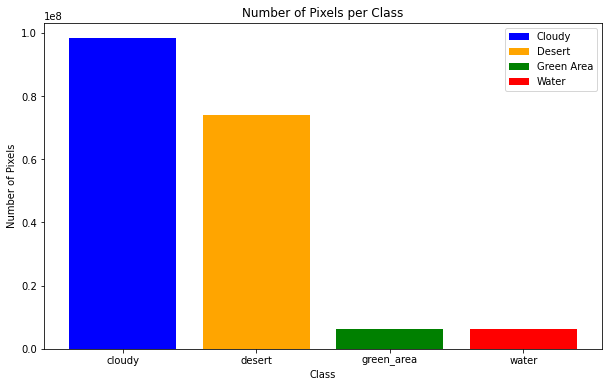

In [22]:
# \textbf{Plot the number of pixels per class}
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Class'], df['Number of Pixels'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Pixels')
plt.title('Number of Pixels per Class')

# Add légend
plt.legend(bars, ['Cloudy', 'Desert', 'Green Area', 'Water'], loc='upper right')

plt.show()


## 3.2) Extraction of significant features from these images using the HOG technique.

Here we extracting meaningful features using the Histogram of Oriented Gradients (HOG) technique. It defines parameters for HOG and includes functions to read, resize, and extract HOG features from images. Another function loads image paths and their corresponding labels from the dataset. The script processes all images, extracts HOG features, and stores them in arrays, preparing the data for machine learning model training. This ensures uniform feature extraction and prepares the dataset for effective image classification

In [6]:
# Parameters for HOG
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'transform_sqrt': True,
    'visualize': False,
    'feature_vector': True
}

# Function to extract HOG features from an image
def extract_hog_features(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to a uniform size
    image_resized = cv2.resize(image, (128, 128))
    # Extract HOG features using the specified parameters
    features = hog(image_resized, **hog_params)
    return features

# Function to load image paths and their corresponding labels
def load_image_paths_and_labels(base_path, subdirectories):
    image_paths = []
    labels = []
    for subdir in subdirectories:
        subdir_path = os.path.join(base_path, subdir)
        for filename in os.listdir(subdir_path):
            if filename.endswith('.jpg'):
                img_path = os.path.join(subdir_path, filename)
                image_paths.append(img_path)
                labels.append(subdir)
    return image_paths, labels

# Load image paths and labels from the dataset
image_paths, labels = load_image_paths_and_labels(data_folder_path, subdirectories)

# Extract HOG features for all images
features = [extract_hog_features(img_path) for img_path in image_paths]
features = np.array(features)
labels = np.array(labels)

In [7]:
# Display the extracted features
# Convert the dictionary to a DataFrame for better visualization
features = pd.DataFrame(features)
features

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.234801,0.032713,0.103921,0.032713,0.264305,0.032881,0.249119,0.065782,0.046448,0.276488,...,0.000000,0.267588,0.127178,0.100314,0.000000,0.114305,0.063871,0.232485,0.267588,0.149160
1,0.191073,0.143967,0.129469,0.034946,0.202658,0.078934,0.064862,0.043820,0.000000,0.299504,...,0.040373,0.202608,0.000000,0.000000,0.000000,0.093121,0.284691,0.284691,0.152082,0.028102
2,0.260714,0.029235,0.074004,0.029328,0.260714,0.000000,0.148119,0.000000,0.000000,0.260714,...,0.152240,0.249203,0.060337,0.102842,0.098135,0.249203,0.178756,0.066967,0.144529,0.118736
3,0.271613,0.047112,0.271613,0.047112,0.271613,0.047382,0.209272,0.047382,0.133273,0.271613,...,0.000000,0.312152,0.000000,0.249666,0.000000,0.312152,0.000000,0.166483,0.000000,0.000000
4,0.262625,0.000000,0.103055,0.040816,0.262625,0.081606,0.262625,0.040924,0.000000,0.262625,...,0.000000,0.289561,0.042791,0.244608,0.000000,0.268898,0.275570,0.081700,0.042791,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,0.330828,0.000000,0.081428,0.000000,0.259103,0.000000,0.122142,0.000000,0.000000,0.330828,...,0.000000,0.299243,0.050846,0.128717,0.050846,0.299243,0.050846,0.160932,0.050846,0.000000
5627,0.297401,0.000000,0.292118,0.000000,0.297401,0.000000,0.109544,0.000000,0.000000,0.297401,...,0.000000,0.286792,0.000000,0.252883,0.000000,0.286792,0.000000,0.144814,0.000000,0.000000
5628,0.320791,0.000000,0.129713,0.067712,0.320791,0.000000,0.043087,0.000000,0.000000,0.320791,...,0.000000,0.278082,0.061593,0.278082,0.061593,0.274571,0.000000,0.233147,0.000000,0.000000
5629,0.272084,0.000000,0.230421,0.121781,0.292434,0.000000,0.230100,0.000000,0.000000,0.292434,...,0.000000,0.284853,0.000000,0.114429,0.000000,0.242741,0.000000,0.076286,0.000000,0.000000


## 3.3) Training and testing

Data Splitting: Splitting the dataset into training and testing sets is crucial for evaluating the performance of machine learning models. It allows us to train the model on one portion of the data and test it on a separate, unseen portion to assess its generalization ability.

By applying these steps, we ensure that our data is properly prepared for training and testing machine learning models, improving the reliability and accuracy of our results.

In [8]:
from sklearn.model_selection import train_test_split

# Divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train.reshape(len(X_train), -1))

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test.reshape(len(X_test), -1))

# Display the dimensions of drive and test assemblies
print("\nDimensions of training and test sets:")
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume features and labels are defined as pandas DataFrame and Series respectively
# Divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize a StandardScaler
scaler = StandardScaler()

# Convert DataFrame to numpy array and reshape
X_train_np = X_train.to_numpy().reshape(len(X_train), -1)
X_test_np = X_test.to_numpy().reshape(len(X_test), -1)

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train_np)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test_np)

# Display the dimensions of training and test sets
print("\nDimensions of training and test sets:")
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)



Dimensions of training and test sets:
X_train shape : (4504, 8100)
X_test shape : (1127, 8100)
y_train shape : (4504,)
y_test shape : (1127,)


In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# Initialize a dictionary to store the results
cv_results_dict = {
    'Kernel': [],
    'Mean Accuracy': [],
    'Standard Deviation': []
}

# List of SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Perform k-fold cross-validation for each kernel
for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(svm_model, features, labels, cv=kfold, scoring='accuracy')
    
    # Store the cross-validation results in the dictionary
    cv_results_dict['Kernel'].append(kernel)
    cv_results_dict['Mean Accuracy'].append(cv_results.mean() * 100.0)
    cv_results_dict['Standard Deviation'].append(cv_results.std() * 100.0)

# Convert the dictionary to a DataFrame for better visualization
cv_results_df = pd.DataFrame(cv_results_dict)

In [12]:
# Display the DataFrame
print("\nCross-Validation Results:")
cv_results_df


Cross-Validation Results:


,Kernel,Mean Accuracy,Standard Deviation
0,linear,96.146247,0.622386
1,poly,96.803409,0.575555
2,rbf,96.519249,0.468058
3,sigmoid,70.893316,0.947390


# 4) Implementing Different Kernels for Multiclass Classifiers and  statistical summary of the Kappa and F-measure coefficients for each combination
To achieve the statistical summary of the Kappa and F-measure coefficients for each combination of classifier and kernel function, we need to compute the minimum, maximum, average, and standard deviation of the values stored in the dataframes.


## 4.1) One-vs-One (OvO) Classifier with Different Kernels

#### 4.1.1) OAO-C

The code evaluates the One-Against-One (OAO) C-SVM classifier with different kernels (Linear, Polynomial, RBF, Sigmoid). It splits the data into training and testing sets, standardizes the features, and tests various parameter combinations for each kernel. The parameters include different values for C, degree, gamma, and r. The Kappa coefficient and F-measure are calculated for each configuration to find the best-performing parameters. This method ensures a thorough evaluation of the classifier's performance across different kernel settings.

##### Linear kernel

In [13]:
# Define the range of C
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1

# Function to train and evaluate the model for a given value of C
def evaluate_oao_c_linear(C):
    svc = SVC(kernel='linear', C=C)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier.fit(X_train, y_train)
    y_pred = ovo_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each C
kappa_values = []
f_measure_values = []

for C in C_values:
    kappa, f_measure = evaluate_oao_c_linear(C)
    kappa_values.append(kappa)
    f_measure_values.append(f_measure)

results1 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results1 = pd.DataFrame(results1)

# Calcul des statistiques
min_values = df_results1.min()
max_values = df_results1.max()
average_values = df_results1.mean()
std_values = df_results1.std()

# Ajout des statistiques au DataFrame
df_results1.loc['Min'] = min_values
df_results1.loc['Max'] = max_values
df_results1.loc['Average'] = average_values
df_results1.loc['Std'] = std_values

# Affichage du DataFrame mis à jour
df_results1


,Kappa,F-measure
0,0.959584,0.969872
1,0.959584,0.969872
Min,0.959584,0.969872
Max,0.959584,0.969872
Average,0.959584,0.969872
Std,0.000000,0.000000


##### Polynomial kernel

In [14]:
# Define parameter value ranges
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
degree_values = [1, 2]
gamma_values = [1, 1/2]
r_values = [1, 2]

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oao_c_polynomial(C, degree, gamma, r):
    svc = SVC(kernel='poly', C=C, degree=degree, gamma=gamma, coef0=r)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier.fit(X_train, y_train)
    y_pred = ovo_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for degree in degree_values:
        for gamma in gamma_values:
            for r in r_values:
                kappa, f_measure = evaluate_oao_c_polynomial(C, degree, gamma, r)
                kappa_values.append(kappa)
                f_measure_values.append(f_measure)

# Store the results in a DataFrame
results2 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results2 = pd.DataFrame(results2)

# Calculate statistics
min_values = df_results2.min()
max_values = df_results2.max()
average_values = df_results2.mean()
std_values = df_results2.std()

# Add statistics to the DataFrame
df_results2.loc['Min'] = min_values
df_results2.loc['Max'] = max_values
df_results2.loc['Average'] = average_values
df_results2.loc['Std'] = std_values
df_results2

,Kappa,F-measure
0,0.959584,0.969872
1,0.959584,0.969872
2,0.959584,0.969872
3,0.959584,0.969872
4,0.906190,0.930038
5,0.906194,0.930015
6,0.906194,0.930015
7,0.910932,0.933504
8,0.959584,0.969872
9,0.959584,0.969872


##### RBF kernel

In [9]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 1/2]

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oao_c_rbf(C, gamma):
    svc = SVC(kernel='rbf', C=C, gamma=gamma)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier.fit(X_train, y_train)
    y_pred = ovo_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        kappa, f_measure = evaluate_oao_c_rbf(C, gamma)
        kappa_values.append(kappa)
        f_measure_values.append(f_measure)

# Store the results in a DataFrame
results3 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results3 = pd.DataFrame(results3)

# Calculate statistics
min_values = df_results3.min()
max_values = df_results3.max()
average_values = df_results3.mean()
std_values = df_results3.std()

# Add statistics to the DataFrame
df_results3.loc['Min'] = min_values
df_results3.loc['Max'] = max_values
df_results3.loc['Average'] = average_values
df_results3.loc['Std'] = std_values

df_results3


,Kappa,F-measure
0,0.000000,0.101442
1,0.000000,0.101442
2,0.016188,0.124205
3,0.016188,0.124205
Min,0.000000,0.101442
Max,0.016188,0.124205
Average,0.008094,0.112823
Std,0.009346,0.013143


##### Sigmoid kernel

In [10]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 1/2]
r_values = [1, 2]

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oao_c_sigmoid(C, gamma, r):
    svc = SVC(kernel='sigmoid', C=C, gamma=gamma, coef0=r)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier.fit(X_train, y_train)
    y_pred = ovo_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        for r in r_values:
            kappa, f_measure = evaluate_oao_c_sigmoid(C, gamma, r)
            kappa_values.append(kappa)
            f_measure_values.append(f_measure)

# Store the results in a DataFrame
results4 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results4 = pd.DataFrame(results4)

# Calculate statistics
min_values = df_results4.min()
max_values = df_results4.max()
average_values = df_results4.mean()
std_values = df_results4.std()

# Add statistics to the DataFrame
df_results4.loc['Min'] = min_values
df_results4.loc['Max'] = max_values
df_results4.loc['Average'] = average_values
df_results4.loc['Std'] = std_values

# Display 
df_results4


,Kappa,F-measure
0,0.308075,0.484232
1,0.311858,0.486870
2,0.333537,0.500869
3,0.331048,0.498724
4,0.301794,0.480249
5,0.305739,0.483503
6,0.299475,0.479027
7,0.296922,0.477514
Min,0.296922,0.477514
Max,0.333537,0.500869


## 4.1.2) OAO-ν Classifier

##### Linear kernel

In [11]:
# Define the range of ν values
nu_values = [0.1]  # ν values

# Function to train and evaluate the model for a given ν value
def evaluate_oao_nu_linear(nu):
    svc = NuSVC(kernel='linear', nu=nu)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier.fit(X_train, y_train)
    y_pred = ovo_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each ν value
kappa_values = []
f_measure_values = []

for nu in nu_values:
    kappa, f_measure = evaluate_oao_nu_linear(nu)
    kappa_values.append(kappa)
    f_measure_values.append(f_measure)

# Store the results in a DataFrame
results5 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results5 = pd.DataFrame(results5)

# Calculate statistics
min_values = df_results5.min()
max_values = df_results5.max()
average_values = df_results5.mean()
std_values = df_results5.std()

# Add statistics to the DataFrame
df_results5.loc['Min'] = min_values
df_results5.loc['Max'] = max_values
df_results5.loc['Average'] = average_values
df_results5.loc['Std'] = std_values

# Display 
df_results5


,Kappa,F-measure
0,0.960765,0.970763
Min,0.960765,0.970763
Max,0.960765,0.970763
Average,0.960765,0.970763
Std,NaN,NaN


##### Polynomial kernel

In [12]:
# Define the range of parameter values
nu_values = [0.1]  # ν values
degree_values = [1, 2]
gamma_values = [1, 1/2]
r_values = [1, 2]

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oao_nu_polynomial(nu, degree, gamma, r):
    svc = NuSVC(kernel='poly', nu=nu, degree=degree, gamma=gamma, coef0=r)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier.fit(X_train, y_train)
    y_pred = ovo_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for degree in degree_values:
        for gamma in gamma_values:
            for r in r_values:
                kappa, f_measure = evaluate_oao_nu_polynomial(nu, degree, gamma, r)
                kappa_values.append(kappa)
                f_measure_values.append(f_measure)

# Store the results in a DataFrame
results6 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results6 = pd.DataFrame(results6)

# Calculate statistics
min_values = df_results6.min()
max_values = df_results6.max()
average_values = df_results6.mean()
std_values = df_results6.std()

# Add statistics to the DataFrame
df_results6.loc['Min'] = min_values
df_results6.loc['Max'] = max_values
df_results6.loc['Average'] = average_values
df_results6.loc['Std'] = std_values

# Display 
df_results6


,Kappa,F-measure
0,0.960765,0.970763
1,0.960765,0.970763
2,0.960765,0.970763
3,0.960765,0.970763
4,0.903826,0.928281
5,0.903826,0.928281
6,0.903826,0.928281
7,0.909745,0.932636
Min,0.903826,0.928281
Max,0.960765,0.970763


##### RBF Kernel

In [13]:
# Define the range of parameter values
nu_values = [0.1]  # ν values 
gamma_values = [1, 1/2]  # γ values 

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oao_nu_rbf(nu, gamma):
    svc = NuSVC(kernel='rbf', nu=nu, gamma=gamma)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier.fit(X_train, y_train)
    y_pred = ovo_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for gamma in gamma_values:
        kappa, f_measure = evaluate_oao_nu_rbf(nu, gamma)
        kappa_values.append(kappa)
        f_measure_values.append(f_measure)

# Store the results in a DataFrame
results7 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results7 = pd.DataFrame(results7)

# Calculate statistics
min_values = df_results7.min()
max_values = df_results7.max()
average_values = df_results7.mean()
std_values = df_results7.std()

# Add statistics to the DataFrame
df_results7.loc['Min'] = min_values
df_results7.loc['Max'] = max_values
df_results7.loc['Average'] = average_values
df_results7.loc['Std'] = std_values

# Display 
df_results7

,Kappa,F-measure
0,0.016188,0.124205
1,0.016188,0.124205
Min,0.016188,0.124205
Max,0.016188,0.124205
Average,0.016188,0.124205
Std,0.000000,0.000000


##### Sigmoid kernel

In [14]:
# Define the range of parameter values
nu_values = [0.1]  # ν values
gamma_values = [1, 1/2]  # γ values
r_values = [1, 2]  # r values

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oao_nu_sigmoid(nu, gamma, r):
    svc = NuSVC(kernel='sigmoid', nu=nu, gamma=gamma, coef0=r)
    ovo_classifier = OneVsOneClassifier(svc)
    ovo_classifier.fit(X_train, y_train)
    y_pred = ovo_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for gamma in gamma_values:
        for r in r_values:
            kappa, f_measure = evaluate_oao_nu_sigmoid(nu, gamma, r)
            kappa_values.append(kappa)
            f_measure_values.append(f_measure)

# Store the results in a DataFrame
results8 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results8 = pd.DataFrame(results8)

# Calculate statistics
min_values = df_results8.min()
max_values = df_results8.max()
average_values = df_results8.mean()
std_values = df_results8.std()

# Add statistics to the DataFrame
df_results8.loc['Min'] = min_values
df_results8.loc['Max'] = max_values
df_results8.loc['Average'] = average_values
df_results8.loc['Std'] = std_values

# Display 
df_results8


,Kappa,F-measure
0,0.022600,0.182184
1,0.030158,0.184937
2,0.025939,0.184023
3,0.039974,0.192434
Min,0.022600,0.182184
Max,0.039974,0.192434
Average,0.029668,0.185894
Std,0.007534,0.004507


## 4.2) OAA Classifier with Different Kernels

## 4.2.1) OAA-C 

##### Linear kernel

In [15]:
# Define the range of C values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1

# Function to train and evaluate the model for a given value of C
def evaluate_oaa_c_linear(C):
    svc = SVC(kernel='linear', C=C)
    ovr_classifier = OneVsRestClassifier(svc)
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each C
kappa_values = []
f_measure_values = []

for C in C_values:
    kappa, f_measure = evaluate_oaa_c_linear(C)
    kappa_values.append(kappa)
    f_measure_values.append(f_measure)

# Store the results in a DataFrame
results9 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results9 = pd.DataFrame(results9)

# Calculate statistics
min_values = df_results9.min()
max_values = df_results9.max()
average_values = df_results9.mean()
std_values = df_results9.std()

# Add statistics to the DataFrame
df_results9.loc['Min'] = min_values
df_results9.loc['Max'] = max_values
df_results9.loc['Average'] = average_values
df_results9.loc['Std'] = std_values

# Display 
df_results9


,Kappa,F-measure
0,0.921582,0.94148
1,0.921582,0.94148
Min,0.921582,0.94148
Max,0.921582,0.94148
Average,0.921582,0.94148
Std,0.000000,0.00000


##### Polynomial kernel

In [16]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
degree_values = [1, 2]  # Degree values 
gamma_values = [1, 1/2]  # γ values
r_values = [1, 2]  # r values

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oaa_c_polynomial(C, degree, gamma, r):
    svc = SVC(kernel='poly', C=C, degree=degree, gamma=gamma, coef0=r)
    ovr_classifier = OneVsRestClassifier(svc)
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for degree in degree_values:
        for gamma in gamma_values:
            for r in r_values:
                kappa, f_measure = evaluate_oaa_c_polynomial(C, degree, gamma, r)
                kappa_values.append(kappa)
                f_measure_values.append(f_measure)

# Store the results in a DataFrame
results10 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results10 = pd.DataFrame(results10)

# Calculate statistics
min_values = df_results10.min()
max_values = df_results10.max()
average_values = df_results10.mean()
std_values = df_results10.std()

# Add statistics to the DataFrame
df_results10.loc['Min'] = min_values
df_results10.loc['Max'] = max_values
df_results10.loc['Average'] = average_values
df_results10.loc['Std'] = std_values

# Display 
df_results10


,Kappa,F-measure
0,0.921582,0.941480
1,0.921582,0.941480
2,0.921582,0.941480
3,0.921582,0.941480
4,0.919147,0.939748
5,0.916782,0.937957
6,0.916782,0.937957
7,0.922753,0.942345
8,0.921582,0.941480
9,0.921582,0.941480


##### RBF Kernel

In [17]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 1/2]  # γ values

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oaa_c_rbf(C, gamma):
    svc = SVC(kernel='rbf', C=C, gamma=gamma)
    ovr_classifier = OneVsRestClassifier(svc)
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        kappa, f_measure = evaluate_oaa_c_rbf(C, gamma)
        kappa_values.append(kappa)
        f_measure_values.append(f_measure)

# Store the results in a DataFrame
results11 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results11 = pd.DataFrame(results11)

# Calculate statistics
min_values = df_results11.min()
max_values = df_results11.max()
average_values = df_results11.mean()
std_values = df_results11.std()

# Add statistics to the DataFrame
df_results11.loc['Min'] = min_values
df_results11.loc['Max'] = max_values
df_results11.loc['Average'] = average_values
df_results11.loc['Std'] = std_values

# Display
df_results11


,Kappa,F-measure
0,0.016188,0.124205
1,0.016188,0.124205
2,0.016188,0.124205
3,0.016188,0.124205
Min,0.016188,0.124205
Max,0.016188,0.124205
Average,0.016188,0.124205
Std,0.000000,0.000000


##### Sigmoid kernel

In [18]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 1/2]  # γ values 
r_values = [1, 2]  # r values

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oaa_c_sigmoid(C, gamma, r):
    svc = SVC(kernel='sigmoid', C=C, gamma=gamma, coef0=r)
    ovr_classifier = OneVsRestClassifier(svc)
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        for r in r_values:
            kappa, f_measure = evaluate_oaa_c_sigmoid(C, gamma, r)
            kappa_values.append(kappa)
            f_measure_values.append(f_measure)
# Store the results in a DataFrame
results12 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results12 = pd.DataFrame(results12)

# Calculate statistics
min_values = df_results12.min()
max_values = df_results12.max()
average_values = df_results12.mean()
std_values = df_results12.std()

# Add statistics to the DataFrame
df_results12.loc['Min'] = min_values
df_results12.loc['Max'] = max_values
df_results12.loc['Average'] = average_values
df_results12.loc['Std'] = std_values

# Display 
df_results12


,Kappa,F-measure
0,0.145425,0.348833
1,0.149046,0.350454
2,0.150421,0.351726
3,0.110685,0.325710
4,0.128136,0.339611
5,0.137468,0.345331
6,0.127060,0.338952
7,0.144416,0.349975
Min,0.110685,0.325710
Max,0.150421,0.351726


## 4.2.2) OAA-ν 

##### Linear kernel

In [19]:
# Define the range of ν values
nu_values = [0.01]  # ν values

# Function to train and evaluate the model for a given value of ν
def evaluate_oaa_nu_linear(nu):
    svc = NuSVC(kernel='linear', nu=nu)
    ovr_classifier = OneVsRestClassifier(svc)
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each ν value
kappa_values = []
f_measure_values = []

for nu in nu_values:
    kappa, f_measure = evaluate_oaa_nu_linear(nu)
    kappa_values.append(kappa)
    f_measure_values.append(f_measure)
# Store the results in a DataFrame
results13 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results13 = pd.DataFrame(results13)

# Calculate statistics
min_values = df_results13.min()
max_values = df_results13.max()
average_values = df_results13.mean()
std_values = df_results13.std()

# Add statistics to the DataFrame
df_results13.loc['Min'] = min_values
df_results13.loc['Max'] = max_values
df_results13.loc['Average'] = average_values
df_results13.loc['Std'] = std_values

# Display
df_results13

,Kappa,F-measure
0,0.921582,0.94148
Min,0.921582,0.94148
Max,0.921582,0.94148
Average,0.921582,0.94148
Std,NaN,NaN


##### Polynomial kernel

In [20]:
# Define the range of parameter values
nu_values = [0.01]  # ν values
degree_values = [1, 2]  # Degree
gamma_values = [1, 1/2]  # γ values
r_values = [1, 2]  # r values

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oaa_nu_polynomial(nu, degree, gamma, r):
    svc = NuSVC(kernel='poly', nu=nu, degree=degree, gamma=gamma, coef0=r)
    ovr_classifier = OneVsRestClassifier(svc)
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for degree in degree_values:
        for gamma in gamma_values:
            for r in r_values:
                kappa, f_measure = evaluate_oaa_nu_polynomial(nu, degree, gamma, r)
                kappa_values.append(kappa)
                f_measure_values.append(f_measure)

# Store the results in a DataFrame
results14 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results14 = pd.DataFrame(results14)

# Calculate statistics
min_values = df_results14.min()
max_values = df_results14.max()
average_values = df_results14.mean()
std_values = df_results14.std()

# Add statistics to the DataFrame
df_results14.loc['Min'] = min_values
df_results14.loc['Max'] = max_values
df_results14.loc['Average'] = average_values
df_results14.loc['Std'] = std_values

# Display 
df_results14


,Kappa,F-measure
0,0.921582,0.941480
1,0.921582,0.941480
2,0.921582,0.941480
3,0.921582,0.941480
4,0.919147,0.939748
5,0.916782,0.937957
6,0.916782,0.937957
7,0.922753,0.942345
Min,0.916782,0.937957
Max,0.922753,0.942345


##### RBF Kernel

In [21]:
# Define the range of parameter values
nu_values = [0.01]  # ν values 
gamma_values = [1, 1/2]  # γ values 

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oaa_nu_rbf(nu, gamma):
    svc = NuSVC(kernel='rbf', nu=nu, gamma=gamma)
    ovr_classifier = OneVsRestClassifier(svc)
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for gamma in gamma_values:
        kappa, f_measure = evaluate_oaa_nu_rbf(nu, gamma)
        kappa_values.append(kappa)
        f_measure_values.append(f_measure)
# Store the results in a DataFrame
results15 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results15 = pd.DataFrame(results15)

# Calculate statistics
min_values = df_results15.min()
max_values = df_results15.max()
average_values = df_results15.mean()
std_values = df_results15.std()

# Add statistics to the DataFrame
df_results15.loc['Min'] = min_values
df_results15.loc['Max'] = max_values
df_results15.loc['Average'] = average_values
df_results15.loc['Std'] = std_values

# Display
df_results15

,Kappa,F-measure
0,0.016188,0.124205
1,0.016188,0.124205
Min,0.016188,0.124205
Max,0.016188,0.124205
Average,0.016188,0.124205
Std,0.000000,0.000000


##### Sigmoid kernel

In [22]:
# Define the range of parameter values
nu_values = [0.01]  # ν values 
gamma_values = [1, 1/2]  # γ values 
r_values = [1, 2]  # r values 

# Function to train and evaluate the model for a given combination of parameters
def evaluate_oaa_nu_sigmoid(nu, gamma, r):
    svc = NuSVC(kernel='sigmoid', nu=nu, gamma=gamma, coef0=r)
    ovr_classifier = OneVsRestClassifier(svc)
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for gamma in gamma_values:
        for r in r_values:
            kappa, f_measure = evaluate_oaa_nu_sigmoid(nu, gamma, r)
            kappa_values.append(kappa)
            f_measure_values.append(f_measure)
# Store the results in a DataFrame
results16 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results16 = pd.DataFrame(results16)

# Calculate statistics
min_values = df_results16.min()
max_values = df_results16.max()
average_values = df_results16.mean()
std_values = df_results16.std()

# Add statistics to the DataFrame
df_results16.loc['Min'] = min_values
df_results16.loc['Max'] = max_values
df_results16.loc['Average'] = average_values
df_results16.loc['Std'] = std_values

# Display 
df_results16

,Kappa,F-measure
0,0.002493,0.148376
1,0.021791,0.147423
2,0.021650,0.155914
3,0.018254,0.167774
Min,0.002493,0.147423
Max,0.021791,0.167774
Average,0.016047,0.154872
Std,0.009183,0.009403


## 4.3) DAG Classifier with Different Kernels

## 4.3.1) DAG-C

##### Linear kernel

In [23]:
# Define the range of C values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1

# Function to train and evaluate the model for a given value of C
def evaluate_dag_c_linear(C):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = SVC(kernel='linear', C=C)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])

    # Function to predict using DAG
    def predict_dag(X):
        predictions = []
        for x in X:
            remaining_classes = list(classes)
            while len(remaining_classes) > 1:
                i, j = remaining_classes[0], remaining_classes[1]
                clf = classifiers[(i, j)]
                pred = clf.predict([x])[0]
                if pred == i:
                    remaining_classes.remove(j)
                else:
                    remaining_classes.remove(i)
            predictions.append(remaining_classes[0])
        return np.array(predictions)
    
    # Make predictions
    y_pred = predict_dag(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each C
kappa_values = []
f_measure_values = []

for C in C_values:
    kappa, f_measure = evaluate_dag_c_linear(C)
    kappa_values.append(kappa)
    f_measure_values.append(f_measure)

# Store the results in a DataFrame
results17 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results17 = pd.DataFrame(results17)

# Calculate statistics
min_values = df_results17.min()
max_values = df_results17.max()
average_values = df_results17.mean()
std_values = df_results17.std()

# Add statistics to the DataFrame
df_results17.loc['Min'] = min_values
df_results17.loc['Max'] = max_values
df_results17.loc['Average'] = average_values
df_results17.loc['Std'] = std_values

# Display 
df_results17


,Kappa,F-measure
0,0.959584,0.969872
1,0.959584,0.969872
Min,0.959584,0.969872
Max,0.959584,0.969872
Average,0.959584,0.969872
Std,0.000000,0.000000


##### Polynomial kernel

In [24]:
# Polynomial kernel parameters
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
degree_values = [1, 2]  # Degree d
gamma_values = [1, 0.5]  # Gamma
coef0_values = [1, 2]  # r

# Function to train and evaluate the model for given values of C, degree, gamma, and coef0
def evaluate_dag_c_poly(C, degree, gamma, coef0):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = SVC(kernel='poly', C=C, degree=degree, gamma=gamma, coef0=coef0)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])

    # Function to predict using DAG
    def predict_dag(X):
        predictions = []
        for x in X:
            remaining_classes = list(classes)
            while len(remaining_classes) > 1:
                i, j = remaining_classes[0], remaining_classes[1]
                clf = classifiers[(i, j)]
                pred = clf.predict([x])[0]
                if pred == i:
                    remaining_classes.remove(j)
                else:
                    remaining_classes.remove(i)
            predictions.append(remaining_classes[0])
        return np.array(predictions)
    
    # Make predictions
    y_pred = predict_dag(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for degree in degree_values:
        for gamma in gamma_values:
            for coef0 in coef0_values:
                kappa, f_measure = evaluate_dag_c_poly(C, degree, gamma, coef0)
                kappa_values.append(kappa)
                f_measure_values.append(f_measure)

# Store the results in a DataFrame
results18 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results18 = pd.DataFrame(results18)

# Calculate statistics
min_values = df_results18.min()
max_values = df_results18.max()
average_values = df_results18.mean()
std_values = df_results18.std()

# Add statistics to the DataFrame
df_results18.loc['Min'] = min_values
df_results18.loc['Max'] = max_values
df_results18.loc['Average'] = average_values
df_results18.loc['Std'] = std_values

# Display 
df_results18


,Kappa,F-measure
0,0.959584,0.969872
1,0.959584,0.969872
2,0.959584,0.969872
3,0.959584,0.969872
4,0.903798,0.928113
5,0.904986,0.929014
6,0.904986,0.929014
7,0.909731,0.932540
8,0.959584,0.969872
9,0.959584,0.969872


##### RBF Kernel

In [25]:
# RBF kernel parameters
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 0.5]  # Gamma values

# Function to train and evaluate the model for given values of C and gamma
def evaluate_dag_c_rbf(C, gamma):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = SVC(kernel='rbf', C=C, gamma=gamma)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])

    # Function to predict using DAG
    def predict_dag(X):
        predictions = []
        for x in X:
            remaining_classes = list(classes)
            while len(remaining_classes) > 1:
                i, j = remaining_classes[0], remaining_classes[1]
                clf = classifiers[(i, j)]
                pred = clf.predict([x])[0]
                if pred == i:
                    remaining_classes.remove(j)
                else:
                    remaining_classes.remove(i)
            predictions.append(remaining_classes[0])
        return np.array(predictions)
    
    # Make predictions
    y_pred = predict_dag(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        kappa, f_measure = evaluate_dag_c_rbf(C, gamma)
        kappa_values.append(kappa)
        f_measure_values.append(f_measure)

# Store the results in a DataFrame
results19 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results19 = pd.DataFrame(results19)

# Calculate statistics
min_values = df_results19.min()
max_values = df_results19.max()
average_values = df_results19.mean()
std_values = df_results19.std()

# Add statistics to the DataFrame
df_results19.loc['Min'] = min_values
df_results19.loc['Max'] = max_values
df_results19.loc['Average'] = average_values
df_results19.loc['Std'] = std_values

# Display 
df_results19

,Kappa,F-measure
0,0.000000,0.101442
1,0.000000,0.101442
2,0.016188,0.124205
3,0.016188,0.124205
Min,0.000000,0.101442
Max,0.016188,0.124205
Average,0.008094,0.112823
Std,0.009346,0.013143


##### Sigmoid kernel

In [26]:
# Sigmoid kernel parameters
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 0.5]  # Gamma values
coef0_values = [1, 2]  # r values

# Function to train and evaluate the model for given values of C, gamma, and coef0
def evaluate_dag_c_sigmoid(C, gamma, coef0):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = SVC(kernel='sigmoid', C=C, gamma=gamma, coef0=coef0)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])

    # Function to predict using DAG
    def predict_dag(X):
        predictions = []
        for x in X:
            remaining_classes = list(classes)
            while len(remaining_classes) > 1:
                i, j = remaining_classes[0], remaining_classes[1]
                clf = classifiers[(i, j)]
                pred = clf.predict([x])[0]
                if pred == i:
                    remaining_classes.remove(j)
                else:
                    remaining_classes.remove(i)
            predictions.append(remaining_classes[0])
        return np.array(predictions)
    
    # Make predictions
    y_pred = predict_dag(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        for coef0 in coef0_values:
            kappa, f_measure = evaluate_dag_c_sigmoid(C, gamma, coef0)
            kappa_values.append(kappa)
            f_measure_values.append(f_measure)

# Store the results in a DataFrame
results20 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results20 = pd.DataFrame(results20)

# Calculate statistics
min_values = df_results20.min()
max_values = df_results20.max()
average_values = df_results20.mean()
std_values = df_results20.std()

# Add statistics to the DataFrame
df_results20.loc['Min'] = min_values
df_results20.loc['Max'] = max_values
df_results20.loc['Average'] = average_values
df_results20.loc['Std'] = std_values

# Display 
df_results20


,Kappa,F-measure
0,0.302969,0.464212
1,0.307804,0.467984
2,0.305312,0.466136
3,0.307539,0.467346
4,0.301716,0.462660
5,0.305589,0.466221
6,0.301864,0.462844
7,0.302825,0.464127
Min,0.301716,0.462660
Max,0.307804,0.467984


## 4.3.2) DAG-ν

##### Linear kernel

In [27]:
# Define the range of ν values
nu_values = [0.1]  # ν values

# Function to train and evaluate the model for a given value of ν
def evaluate_dag_nu_linear(nu):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = NuSVC(kernel='linear', nu=nu)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])

    # Function to predict using DAG
    def predict_dag(X):
        predictions = []
        for x in X:
            remaining_classes = list(classes)
            while len(remaining_classes) > 1:
                i, j = remaining_classes[0], remaining_classes[1]
                clf = classifiers[(i, j)]
                pred = clf.predict([x])[0]
                if pred == i:
                    remaining_classes.remove(j)
                else:
                    remaining_classes.remove(i)
            predictions.append(remaining_classes[0])
        return np.array(predictions)
    
    # Make predictions
    y_pred = predict_dag(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each ν value
kappa_values = []
f_measure_values = []

for nu in nu_values:
    kappa, f_measure = evaluate_dag_nu_linear(nu)
    kappa_values.append(kappa)
    f_measure_values.append(f_measure)

# Store the results in a DataFrame
results21 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results21 = pd.DataFrame(results21)

# Calculate statistics
min_values = df_results21.min()
max_values = df_results21.max()
average_values = df_results21.mean()
std_values = df_results21.std()

# Add statistics to the DataFrame
df_results21.loc['Min'] = min_values
df_results21.loc['Max'] = max_values
df_results21.loc['Average'] = average_values
df_results21.loc['Std'] = std_values

# Display 
df_results21


,Kappa,F-measure
0,0.960765,0.970763
Min,0.960765,0.970763
Max,0.960765,0.970763
Average,0.960765,0.970763
Std,NaN,NaN


##### Polynomial kernel

In [28]:
# Polynomial kernel parameters
nu_values = [0.1]  # ν values
degree_values = [1, 2]  # Degree d
gamma_values = [1, 0.5]  # Gamma values
coef0_values = [1, 2]  # r values

# Function to train and evaluate the model for given values of ν, degree, gamma, and coef0
def evaluate_dag_nu_poly(nu, degree, gamma, coef0):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = NuSVC(kernel='poly', nu=nu, degree=degree, gamma=gamma, coef0=coef0)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])

    # Function to predict using DAG
    def predict_dag(X):
        predictions = []
        for x in X:
            remaining_classes = list(classes)
            while len(remaining_classes) > 1:
                i, j = remaining_classes[0], remaining_classes[1]
                clf = classifiers[(i, j)]
                pred = clf.predict([x])[0]
                if pred == i:
                    remaining_classes.remove(j)
                else:
                    remaining_classes.remove(i)
            predictions.append(remaining_classes[0])
        return np.array(predictions)
    
    # Make predictions
    y_pred = predict_dag(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for degree in degree_values:
        for gamma in gamma_values:
            for coef0 in coef0_values:
                kappa, f_measure = evaluate_dag_nu_poly(nu, degree, gamma, coef0)
                kappa_values.append(kappa)
                f_measure_values.append(f_measure)

# Store the results in a DataFrame
results22 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results22 = pd.DataFrame(results22)

# Calculate statistics
min_values = df_results22.min()
max_values = df_results22.max()
average_values = df_results22.mean()
std_values = df_results22.std()

# Add statistics to the DataFrame
df_results22.loc['Min'] = min_values
df_results22.loc['Max'] = max_values
df_results22.loc['Average'] = average_values
df_results22.loc['Std'] = std_values

# Display 
df_results22


,Kappa,F-measure
0,0.960765,0.970763
1,0.960765,0.970763
2,0.960765,0.970763
3,0.960765,0.970763
4,0.903798,0.928151
5,0.903798,0.928151
6,0.903798,0.928151
7,0.908543,0.931676
Min,0.903798,0.928151
Max,0.960765,0.970763


##### RBF Kernel

In [29]:
# RBF kernel parameters
nu_values = [0.1]  # ν values 
gamma_values = [1, 0.5]  # Gamma values

# Function to train and evaluate the model for given values of ν and gamma
def evaluate_dag_nu_rbf(nu, gamma):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = NuSVC(kernel='rbf', nu=nu, gamma=gamma)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])

    # Function to predict using DAG
    def predict_dag(X):
        predictions = []
        for x in X:
            remaining_classes = list(classes)
            while len(remaining_classes) > 1:
                i, j = remaining_classes[0], remaining_classes[1]
                clf = classifiers[(i, j)]
                pred = clf.predict([x])[0]
                if pred == i:
                    remaining_classes.remove(j)
                else:
                    remaining_classes.remove(i)
            predictions.append(remaining_classes[0])
        return np.array(predictions)
    
    # Make predictions
    y_pred = predict_dag(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for gamma in gamma_values:
        kappa, f_measure = evaluate_dag_nu_rbf(nu, gamma)
        kappa_values.append(kappa)
        f_measure_values.append(f_measure)
# Store the results in a DataFrame
results23 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results23 = pd.DataFrame(results23)

# Calculate statistics
min_values = df_results23.min()
max_values = df_results23.max()
average_values = df_results23.mean()
std_values = df_results23.std()

# Add statistics to the DataFrame
df_results23.loc['Min'] = min_values
df_results23.loc['Max'] = max_values
df_results23.loc['Average'] = average_values
df_results23.loc['Std'] = std_values

# Display 
df_results23


,Kappa,F-measure
0,0.016188,0.124205
1,0.016188,0.124205
Min,0.016188,0.124205
Max,0.016188,0.124205
Average,0.016188,0.124205
Std,0.000000,0.000000


##### Sigmoid kernel

In [30]:
# Sigmoid kernel parameters
nu_values = [0.1]  # ν values 
gamma_values = [1, 0.5]  # Gamma values
coef0_values = [1, 2]  # r values

# Function to train and evaluate the model for given values of ν, gamma, and coef0
def evaluate_dag_nu_sigmoid(nu, gamma, coef0):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = NuSVC(kernel='sigmoid', nu=nu, gamma=gamma, coef0=coef0)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])

    # Function to predict using DAG
    def predict_dag(X):
        predictions = []
        for x in X:
            remaining_classes = list(classes)
            while len(remaining_classes) > 1:
                i, j = remaining_classes[0], remaining_classes[1]
                clf = classifiers[(i, j)]
                pred = clf.predict([x])[0]
                if pred == i:
                    remaining_classes.remove(j)
                else:
                    remaining_classes.remove(i)
            predictions.append(remaining_classes[0])
        return np.array(predictions)
    
    # Make predictions
    y_pred = predict_dag(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for nu in nu_values:
    for gamma in gamma_values:
        for coef0 in coef0_values:
            kappa, f_measure = evaluate_dag_nu_sigmoid(nu, gamma, coef0)
            kappa_values.append(kappa)
            f_measure_values.append(f_measure)
# Store the results in a DataFrame
results24 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results24 = pd.DataFrame(results24)

# Calculate statistics
min_values = df_results24.min()
max_values = df_results24.max()
average_values = df_results24.mean()
std_values = df_results24.std()

# Add statistics to the DataFrame
df_results24.loc['Min'] = min_values
df_results24.loc['Max'] = max_values
df_results24.loc['Average'] = average_values
df_results24.loc['Std'] = std_values

# Display 
df_results24


,Kappa,F-measure
0,0.069329,0.196151
1,0.073025,0.198687
2,0.065381,0.192135
3,0.082515,0.206867
Min,0.065381,0.192135
Max,0.082515,0.206867
Average,0.072562,0.198460
Std,0.007332,0.006220


## 4.4) WW Classifier with Different Kernels

##### Linear kernel

In [31]:
# Define the range of C values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1

# Function to train and evaluate the WW model for a given value of C
def evaluate_ww_linear(C):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    class_indices = {cls: idx for idx, cls in enumerate(classes)}
    
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = SVC(kernel='linear', C=C)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])
    
    # Function to predict using WW method
    def predict_ww(X):
        votes = np.zeros((len(X), len(classes)))
        for (i, j), clf in classifiers.items():
            predictions = clf.decision_function(X)
            for idx, pred in enumerate(predictions):
                if pred > 0:
                    votes[idx, class_indices[i]] += 1
                else:
                    votes[idx, class_indices[j]] += 1
        return classes[np.argmax(votes, axis=1)]
    
    # Make predictions
    y_pred = predict_ww(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each C
kappa_values = []
f_measure_values = []

for C in C_values:
    kappa, f_measure = evaluate_ww_linear(C)
    kappa_values.append(kappa)
    f_measure_values.append(f_measure)

# Store the results in a DataFrame
results25 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results25 = pd.DataFrame(results25)

# Calculate statistics
min_values = df_results25.min()
max_values = df_results25.max()
average_values = df_results25.mean()
std_values = df_results25.std()

# Add statistics to the DataFrame
df_results25.loc['Min'] = min_values
df_results25.loc['Max'] = max_values
df_results25.loc['Average'] = average_values
df_results25.loc['Std'] = std_values

# Display
df_results25


,Kappa,F-measure
0,-0.301995,0.0
1,-0.301995,0.0
Min,-0.301995,0.0
Max,-0.301995,0.0
Average,-0.301995,0.0
Std,0.000000,0.0


##### Polynomial kernel

In [32]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
degree_values = [1, 2]  # Degree d
gamma_values = [1, 0.5]  # Gamma values
coef0_values = [1, 2]  # r values

# Function to train and evaluate the WW model for given values of C, degree, gamma, and coef0
def evaluate_ww_poly(C, degree, gamma, coef0):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    class_indices = {cls: idx for idx, cls in enumerate(classes)}
    
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = SVC(kernel='poly', C=C, degree=degree, gamma=gamma, coef0=coef0)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])
    
    # Function to predict using WW method
    def predict_ww(X):
        votes = np.zeros((len(X), len(classes)))
        for (i, j), clf in classifiers.items():
            predictions = clf.decision_function(X)
            for idx, pred in enumerate(predictions):
                if pred > 0:
                    votes[idx, class_indices[i]] += 1
                else:
                    votes[idx, class_indices[j]] += 1
        return classes[np.argmax(votes, axis=1)]
    
    # Make predictions
    y_pred = predict_ww(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for degree in degree_values:
        for gamma in gamma_values:
            for coef0 in coef0_values:
                kappa, f_measure = evaluate_ww_poly(C, degree, gamma, coef0)
                kappa_values.append(kappa)
                f_measure_values.append(f_measure)

# Store the results in a DataFrame
results26 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results26 = pd.DataFrame(results26)

# Calculate statistics
min_values = df_results26.min()
max_values = df_results26.max()
average_values = df_results26.mean()
std_values = df_results26.std()

# Add statistics to the DataFrame
df_results26.loc['Min'] = min_values
df_results26.loc['Max'] = max_values
df_results26.loc['Average'] = average_values
df_results26.loc['Std'] = std_values

# Display 
df_results26


,Kappa,F-measure
0,-0.301995,0.000000
1,-0.301995,0.000000
2,-0.301995,0.000000
3,-0.301995,0.000000
4,-0.348637,0.003646
5,-0.348742,0.003629
6,-0.348742,0.003629
7,-0.348597,0.003591
8,-0.301995,0.000000
9,-0.301995,0.000000


##### RBF Kernel

In [34]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 0.5]  # Gamma values

# Function to train and evaluate the WW model for given values of C and gamma
def evaluate_ww_rbf(C, gamma):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    class_indices = {cls: idx for idx, cls in enumerate(classes)}
    
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = SVC(kernel='rbf', C=C, gamma=gamma)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])
    
    # Function to predict using WW method
    def predict_ww(X):
        votes = np.zeros((len(X), len(classes)))
        for (i, j), clf in classifiers.items():
            predictions = clf.decision_function(X)
            for idx, pred in enumerate(predictions):
                if pred > 0:
                    votes[idx, class_indices[i]] += 1
                else:
                    votes[idx, class_indices[j]] += 1
        return classes[np.argmax(votes, axis=1)]
    
    # Make predictions
    y_pred = predict_ww(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        kappa, f_measure = evaluate_ww_rbf(C, gamma)
        kappa_values.append(kappa)
        f_measure_values.append(f_measure)

# Store the results in a DataFrame
results27 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results27 = pd.DataFrame(results27)

# Calculate statistics
min_values = df_results27.min()
max_values = df_results27.max()
average_values = df_results27.mean()
std_values = df_results27.std()

# Add statistics to the DataFrame
df_results27.loc['Min'] = min_values
df_results27.loc['Max'] = max_values
df_results27.loc['Average'] = average_values
df_results27.loc['Std'] = std_values

# Display 
df_results27


,Kappa,F-measure
0,0.000000,0.067537
1,0.000000,0.067537
2,-0.015759,0.064286
3,-0.015759,0.064286
Min,-0.015759,0.064286
Max,0.000000,0.067537
Average,-0.007880,0.065911
Std,0.009099,0.001877


##### Sigmoid kernel

In [35]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 0.5]  # Gamma values
coef0_values = [1, 2]  # r values

# Function to train and evaluate the WW model for given values of C, gamma, and coef0
def evaluate_ww_sigmoid(C, gamma, coef0):
    # Initialize binary classifiers for each pair of classes
    classifiers = {}
    classes = np.unique(y_train)
    class_indices = {cls: idx for idx, cls in enumerate(classes)}
    
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            class_pair = (classes[i], classes[j])
            svc = SVC(kernel='sigmoid', C=C, gamma=gamma, coef0=coef0)
            mask = np.isin(y_train, class_pair)
            classifiers[class_pair] = svc.fit(X_train[mask], y_train[mask])
    
    # Function to predict using WW method
    def predict_ww(X):
        votes = np.zeros((len(X), len(classes)))
        for (i, j), clf in classifiers.items():
            predictions = clf.decision_function(X)
            for idx, pred in enumerate(predictions):
                if pred > 0:
                    votes[idx, class_indices[i]] += 1
                else:
                    votes[idx, class_indices[j]] += 1
        return classes[np.argmax(votes, axis=1)]
    
    # Make predictions
    y_pred = predict_ww(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        for coef0 in coef0_values:
            kappa, f_measure = evaluate_ww_sigmoid(C, gamma, coef0)
            kappa_values.append(kappa)
            f_measure_values.append(f_measure)

# Store the results in a DataFrame
results28 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results28 = pd.DataFrame(results28)

# Calculate statistics
min_values = df_results28.min()
max_values = df_results28.max()
average_values = df_results28.mean()
std_values = df_results28.std()

# Add statistics to the DataFrame
df_results28.loc['Min'] = min_values
df_results28.loc['Max'] = max_values
df_results28.loc['Average'] = average_values
df_results28.loc['Std'] = std_values

# Display 
df_results28


,Kappa,F-measure
0,-0.247257,0.071699
1,-0.251758,0.066473
2,-0.237489,0.081341
3,-0.244912,0.074261
4,-0.236311,0.082647
5,-0.237360,0.081520
6,-0.236316,0.082651
7,-0.236147,0.083027
Min,-0.251758,0.066473
Max,-0.236147,0.083027


##  4.5) CS  Classifier with Different Kernels

##### Linear kernel

In [36]:
# Define the range of C values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1

# Function to train and evaluate the CS model for a given value of C
def evaluate_cs_linear(C):
    svc = LinearSVC(C=C, multi_class='crammer_singer')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each C
kappa_values = []
f_measure_values = []

for C in C_values:
    kappa, f_measure = evaluate_cs_linear(C)
    kappa_values.append(kappa)
    f_measure_values.append(f_measure)
# Store the results in a DataFrame
results29 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results29 = pd.DataFrame(results29)

# Calculate statistics
min_values = df_results29.min()
max_values = df_results29.max()
average_values = df_results29.mean()
std_values = df_results29.std()

# Add statistics to the DataFrame
df_results29.loc['Min'] = min_values
df_results29.loc['Max'] = max_values
df_results29.loc['Average'] = average_values
df_results29.loc['Std'] = std_values

# Display 
df_results29


/home/aimssn-it/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/aimssn-it/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,Kappa,F-measure
0,0.903926,0.928482
1,0.903926,0.928482
Min,0.903926,0.928482
Max,0.903926,0.928482
Average,0.903926,0.928482
Std,0.000000,0.000000


##### Polynomial kernel

In [37]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
degree_values = [1, 2]  # Degree d
gamma_values = [1, 0.5]  # Gamma values
coef0_values = [1, 2]  # r values

# Function to train and evaluate the CS model for given values of C, degree, gamma, and coef0
def evaluate_cs_poly(C, degree, gamma, coef0):
    svc = SVC(kernel='poly', C=C, degree=degree, gamma=gamma, coef0=coef0, decision_function_shape='ovr')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for degree in degree_values:
        for gamma in gamma_values:
            for coef0 in coef0_values:
                kappa, f_measure = evaluate_cs_poly(C, degree, gamma, coef0)
                kappa_values.append(kappa)
                f_measure_values.append(f_measure)

# Store the results in a DataFrame
results30 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results30 = pd.DataFrame(results30)

# Calculate statistics
min_values = df_results30.min()
max_values = df_results30.max()
average_values = df_results30.mean()
std_values = df_results30.std()

# Add statistics to the DataFrame
df_results30.loc['Min'] = min_values
df_results30.loc['Max'] = max_values
df_results30.loc['Average'] = average_values
df_results30.loc['Std'] = std_values

# Display 
df_results30


,Kappa,F-measure
0,0.959584,0.969872
1,0.959584,0.969872
2,0.959584,0.969872
3,0.959584,0.969872
4,0.907344,0.930926
5,0.908540,0.931787
6,0.908540,0.931787
7,0.913276,0.935308
8,0.959584,0.969872
9,0.959584,0.969872


##### RBF Kernel

In [38]:
# Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 0.5]  # Gamma values

# Function to train and evaluate the CS model for given values of C and gamma
def evaluate_cs_rbf(C, gamma):
    svc = SVC(kernel='rbf', C=C, gamma=gamma, decision_function_shape='ovr')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        kappa, f_measure = evaluate_cs_rbf(C, gamma)
        kappa_values.append(kappa)
        f_measure_values.append(f_measure)

# Store the results in a DataFrame
results31 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results31 = pd.DataFrame(results31)

# Calculate statistics
min_values = df_results31.min()
max_values = df_results31.max()
average_values = df_results31.mean()
std_values = df_results31.std()

# Add statistics to the DataFrame
df_results31.loc['Min'] = min_values
df_results31.loc['Max'] = max_values
df_results31.loc['Average'] = average_values
df_results31.loc['Std'] = std_values

# Display 
df_results31


,Kappa,F-measure
0,0.000000,0.101442
1,0.000000,0.101442
2,0.016188,0.124205
3,0.016188,0.124205
Min,0.000000,0.101442
Max,0.016188,0.124205
Average,0.008094,0.112823
Std,0.009346,0.013143


##### Sigmoid kernel

In [39]:
#Define the range of parameter values
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1
gamma_values = [1, 0.5]  # Gamma values
coef0_values = [1, 2]  # r values

# Function to train and evaluate the CS model for given values of C, gamma, and coef0
def evaluate_cs_sigmoid(C, gamma, coef0):
    svc = SVC(kernel='sigmoid', C=C, gamma=gamma, coef0=coef0, decision_function_shape='ovr')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    kappa = cohen_kappa_score(y_test, y_pred)
    f_measure = f1_score(y_test, y_pred, average='weighted')
    
    return kappa, f_measure

# Evaluate for each combination of parameters
kappa_values = []
f_measure_values = []

for C in C_values:
    for gamma in gamma_values:
        for coef0 in coef0_values:
            kappa, f_measure = evaluate_cs_sigmoid(C, gamma, coef0)
            kappa_values.append(kappa)
            f_measure_values.append(f_measure)
# Store the results in a DataFrame
results32 = {'Kappa': kappa_values, 'F-measure': f_measure_values}
df_results32 = pd.DataFrame(results32)

# Calculate statistics
min_values = df_results32.min()
max_values = df_results32.max()
average_values = df_results32.mean()
std_values = df_results32.std()

# Add statistics to the DataFrame
df_results32.loc['Min'] = min_values
df_results32.loc['Max'] = max_values
df_results32.loc['Average'] = average_values
df_results32.loc['Std'] = std_values

# Display
df_results32


,Kappa,F-measure
0,0.240258,0.443328
1,0.239099,0.442216
2,0.264740,0.458832
3,0.254830,0.451060
4,0.235363,0.441293
5,0.235654,0.441371
6,0.229341,0.437147
7,0.221816,0.431560
Min,0.221816,0.431560
Max,0.264740,0.458832


# 5) Plots

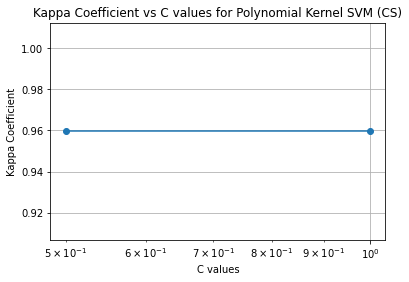

In [40]:
import matplotlib.pyplot as plt

# Assuming results30 is a DataFrame or a list where the order of Kappa values matches the order of C values
# Extract the C values and corresponding Kappa coefficients
C_values = [2**i for i in range(-1, 1)]  # C values: 0.5, 1

# Extract the Kappa values directly if their order matches the order of C values
kappa_values = df_results30['Kappa'].values[:len(C_values)]

# Plot the graph
plt.plot(C_values, kappa_values, marker='o')
plt.xlabel('C values')
plt.ylabel('Kappa Coefficient')
plt.title('Kappa Coefficient vs C values for Polynomial Kernel SVM (CS)')
plt.xscale('log')
plt.grid(True)
plt.show()



## 5.1) Plot the average Kappa coefficient for different types of kernels for OAO-C classifier.

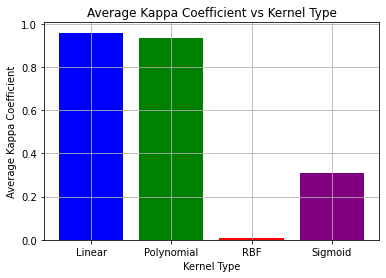

In [41]:
# Extract the average Kappa values from each DataFrame
avg_kappa_linear = df_results1.loc['Average', 'Kappa']
avg_kappa_poly = df_results2.loc['Average', 'Kappa']
avg_kappa_rbf = df_results3.loc['Average', 'Kappa']
avg_kappa_sigmoid = df_results4.loc['Average', 'Kappa']

# Define the kernels and their corresponding average Kappa values
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
avg_kappa_values = [avg_kappa_linear, avg_kappa_poly, avg_kappa_rbf, avg_kappa_sigmoid]

# Plot the graph
plt.bar(kernels, avg_kappa_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Kernel Type')
plt.ylabel('Average Kappa Coefficient')
plt.title('Average Kappa Coefficient vs Kernel Type')
plt.grid(True)
plt.show()


##### Analysis and interpretation:

- The graph shows the average Kappa coefficients for different types of kernels (Linear, Polynomial, RBF, and       Sigmoid) used with an OAO-C classifier.
  We observe that the average Kappa coefficient for the Linear kernel is close to 1, indicating a very high level   of agreement.
  We also observe that the Sigmoid kernel has a moderate average Kappa coefficient, significantly lower than those   of the Linear and Polynomial kernels but higher than that of the RBF kernel.
- Therefore, we can say that the Linear and Polynomial kernels show the best performance, indicating excellent       agreement for this type of classifier on our dataset. These kernels seem well-suited to the nature of our         dataset.
  We can also say that the poor performance of the RBF kernel suggests that it may not be appropriate for this       type of classifier on our dataset.

## 5.2) Plot the average Kappa coefficient for different types of kernels for OAO-nu classifier. 

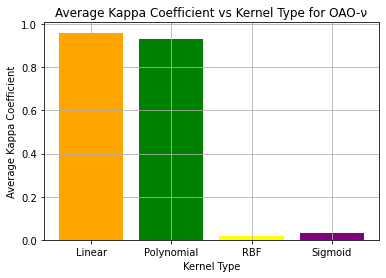

In [42]:
# Extract the average Kappa values from each DataFrame
avg_kappa_linear = df_results5.loc['Average', 'Kappa']
avg_kappa_poly = df_results6.loc['Average', 'Kappa']
avg_kappa_rbf = df_results7.loc['Average', 'Kappa']
avg_kappa_sigmoid = df_results8.loc['Average', 'Kappa']

# Define the kernels and their corresponding average Kappa values
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
avg_kappa_values = [avg_kappa_linear, avg_kappa_poly, avg_kappa_rbf, avg_kappa_sigmoid]

# Plot the graph
plt.bar(kernels, avg_kappa_values, color=['orange', 'green', 'yellow', 'purple'])
plt.xlabel('Kernel Type')
plt.ylabel('Average Kappa Coefficient')
plt.title('Average Kappa Coefficient vs Kernel Type for OAO-ν')
plt.grid(True)
plt.show()


##### Analysis and interpretation:

- The graph shows the average Kappa coefficients for different kernels (Linear, Polynomial, RBF, and Sigmoid) used with an OAO-ν classifier.

  The Linear kernel has an average Kappa coefficient close to 1, indicating excellent performance.
  The Polynomial kernel also performs very well, with a slightly lower but still high Kappa coefficient.
  The Sigmoid kernel shows moderate performance, with a Kappa coefficient lower than the Linear and Polynomial   kernels but higher than the RBF kernel.
  The RBF kernel performs poorly, with a very low Kappa coefficient, indicating it may not be suitable for this dataset with the OAO-ν classifier.
- Overall, the Linear and Polynomial kernels are the most effective for this classification task, while the RBF kernel is the least effective.

## 5.3) Plot the average Kappa coefficient for different types of kernels for OAA-C classifier. 

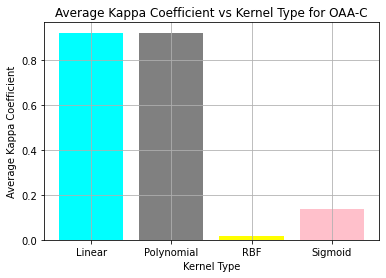

In [43]:
# Extract the average Kappa values from each DataFrame
avg_kappa_linear = df_results9.loc['Average', 'Kappa']
avg_kappa_poly = df_results10.loc['Average', 'Kappa']
avg_kappa_rbf = df_results11.loc['Average', 'Kappa']
avg_kappa_sigmoid = df_results12.loc['Average', 'Kappa']

# Define the kernels and their corresponding average Kappa values
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
avg_kappa_values = [avg_kappa_linear, avg_kappa_poly, avg_kappa_rbf, avg_kappa_sigmoid]

# Plot the graph
plt.bar(kernels, avg_kappa_values, color=['cyan', 'grey', 'yellow', 'pink'])
plt.xlabel('Kernel Type')
plt.ylabel('Average Kappa Coefficient')
plt.title('Average Kappa Coefficient vs Kernel Type for OAA-C')
plt.grid(True)
plt.show()


##### Analysis and interpretation:
- The graph shows the average Kappa coefficients for different kernels (Linear, Polynomial, RBF, and Sigmoid) used with an OAA-C classifier.

  The Linear kernel has a very high Kappa coefficient, indicating excellent performance.
  The Polynomial kernel also performs very well, with a slightly lower but still high Kappa coefficient.
  The RBF kernel performs poorly, with a very low Kappa coefficient, suggesting it may not be suitable for this     dataset.
  The Sigmoid kernel shows moderate performance, with a Kappa coefficient lower than the Linear and Polynomial       kernels but higher than the RBF kernel.
- Overall, the Linear and Polynomial kernels are the most effective for this classification task, while the RBF     kernel is the least effective.

## 5.4) Plot the average Kappa coefficient for different types of kernels for OAA-nu classifier. 

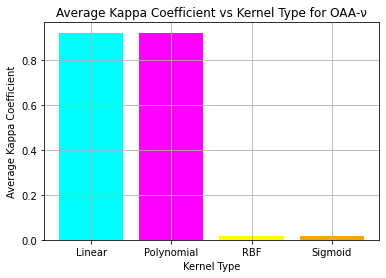

In [44]:
# Extract the average Kappa values from each DataFrame
avg_kappa_linear = df_results13.loc['Average', 'Kappa']
avg_kappa_poly = df_results14.loc['Average', 'Kappa']
avg_kappa_rbf = df_results15.loc['Average', 'Kappa']
avg_kappa_sigmoid = df_results16.loc['Average', 'Kappa']

# Define the kernels and their corresponding average Kappa values
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
avg_kappa_values = [avg_kappa_linear, avg_kappa_poly, avg_kappa_rbf, avg_kappa_sigmoid]

# Plot the graph
plt.bar(kernels, avg_kappa_values, color=['cyan', 'magenta', 'yellow', 'orange'])
plt.xlabel('Kernel Type')
plt.ylabel('Average Kappa Coefficient')
plt.title('Average Kappa Coefficient vs Kernel Type for OAA-ν')
plt.grid(True)
plt.show()


##### Analysis and interpretation:
- The graph shows the average Kappa coefficients for different kernels (Linear, Polynomial, RBF, and Sigmoid) used with an OAA-ν classifier.

  The Linear kernel has a very high Kappa coefficient, indicating excellent performance.
  The Polynomial kernel also performs very well, with a slightly lower but still high Kappa coefficient.
  Both the RBF and Sigmoid kernels perform poorly, with very low Kappa coefficients, suggesting they may not be     suitable for this dataset.
- Overall, the Linear and Polynomial kernels are the most effective for this classification task, while the RBF     and Sigmoid kernels are the least effective.

## 5.5) Plot the average Kappa coefficient for different types of kernels for DAG-C classifier. 

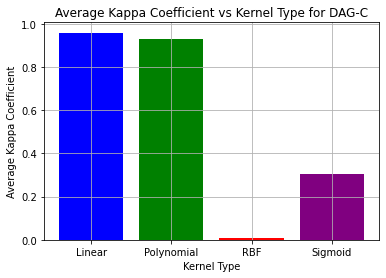

In [45]:
# Extract the average Kappa values from each DataFrame
avg_kappa_linear = df_results17.loc['Average', 'Kappa']
avg_kappa_poly = df_results18.loc['Average', 'Kappa']
avg_kappa_rbf = df_results19.loc['Average', 'Kappa']
avg_kappa_sigmoid = df_results20.loc['Average', 'Kappa']

# Define the kernels and their corresponding average Kappa values
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
avg_kappa_values = [avg_kappa_linear, avg_kappa_poly, avg_kappa_rbf, avg_kappa_sigmoid]

# Plot the graph
plt.bar(kernels, avg_kappa_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Kernel Type')
plt.ylabel('Average Kappa Coefficient')
plt.title('Average Kappa Coefficient vs Kernel Type for DAG-C')
plt.grid(True)
plt.show()


##### Analysis and interpretation:
- The graph shows the average Kappa coefficients for different kernels (Linear, Polynomial, RBF, and Sigmoid) used with a DAG-C classifier.

  The Linear kernel has a very high Kappa coefficient, indicating excellent performance.
  The Polynomial kernel also performs very well, with a slightly lower but still high Kappa coefficient.
  The RBF kernel performs poorly, with a very low Kappa coefficient, suggesting it may not be suitable for this dataset.
  The Sigmoid kernel shows moderate performance, with a Kappa coefficient lower than the Linear and Polynomial kernels but higher than the RBF kernel.
- Overall, the Linear and Polynomial kernels are the most effective for this classification task, while the RBF kernel is the least effective. The Sigmoid kernel provides moderate performance.

## 5.6) Plot the average Kappa coefficient for different types of kernels for DAG-nu classifier. 

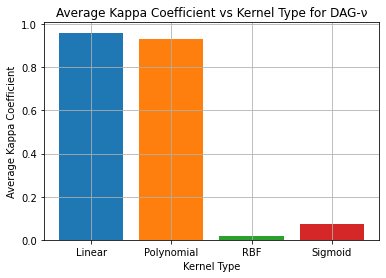

In [46]:
# Extract the average Kappa values from each DataFrame
avg_kappa_linear = df_results21.loc['Average', 'Kappa']
avg_kappa_poly = df_results22.loc['Average', 'Kappa']
avg_kappa_rbf = df_results23.loc['Average', 'Kappa']
avg_kappa_sigmoid = df_results24.loc['Average', 'Kappa']

# Define the kernels and their corresponding average Kappa values
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
avg_kappa_values = [avg_kappa_linear, avg_kappa_poly, avg_kappa_rbf, avg_kappa_sigmoid]

# Plot the graph
plt.bar(kernels, avg_kappa_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Kernel Type')
plt.ylabel('Average Kappa Coefficient')
plt.title('Average Kappa Coefficient vs Kernel Type for DAG-ν')
plt.grid(True)
plt.show()


##### Analysis and interpretation:
- The graph shows the average Kappa coefficients for different kernels (Linear, Polynomial, RBF, and Sigmoid) used with a DAG-ν classifier.

  The Linear kernel has a very high Kappa coefficient, indicating excellent performance.
  The Polynomial kernel also performs very well, with a slightly lower but still high Kappa coefficient.
  The RBF kernel performs poorly, with a very low Kappa coefficient, suggesting it may not be suitable for this dataset.
  The Sigmoid kernel also shows low performance, with a Kappa coefficient higher than the RBF kernel but significantly lower than the Linear and Polynomial kernels.
- Overall, the Linear and Polynomial kernels are the most effective for this classification task, while the RBF kernel is the least effective. The Sigmoid kernel provides low performance.

## 5.7) Plot the average Kappa coefficient for different types of kernels for WW classifier. 

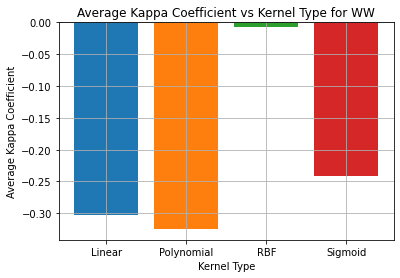

In [47]:
# Extract the average Kappa values from each DataFrame
avg_kappa_linear = df_results25.loc['Average', 'Kappa']
avg_kappa_poly = df_results26.loc['Average', 'Kappa']
avg_kappa_rbf = df_results27.loc['Average', 'Kappa']
avg_kappa_sigmoid = df_results28.loc['Average', 'Kappa']

# Define the kernels and their corresponding average Kappa values
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
avg_kappa_values = [avg_kappa_linear, avg_kappa_poly, avg_kappa_rbf, avg_kappa_sigmoid]

# Plot the graph
plt.bar(kernels, avg_kappa_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Kernel Type')
plt.ylabel('Average Kappa Coefficient')
plt.title('Average Kappa Coefficient vs Kernel Type for WW')
plt.grid(True)
plt.show()


##### Analysis and interpretation:
- The graph shows the average Kappa coefficients for different kernels (Linear, Polynomial, RBF, and Sigmoid) used with a WW classifier.

  All kernels (Linear, Polynomial, RBF, and Sigmoid) have negative Kappa coefficients, indicating poor performance on this dataset.
  The RBF kernel performs slightly better than the others but still shows poor performance.
  The Linear, Polynomial, and Sigmoid kernels all have similar negative Kappa coefficients.
- Overall, the WW classifier does not perform well with any of the kernels on this dataset, suggesting that it may not be suitable or requires further parameter tuning.

## 5.8) Plot the average Kappa coefficient for different types of kernels for CS classifier. 

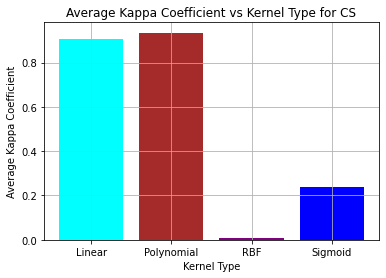

In [48]:
# Extract the average Kappa values from each DataFrame
avg_kappa_linear = df_results29.loc['Average', 'Kappa']
avg_kappa_poly = df_results30.loc['Average', 'Kappa']
avg_kappa_rbf = df_results31.loc['Average', 'Kappa']
avg_kappa_sigmoid = df_results32.loc['Average', 'Kappa']

# Define the kernels and their corresponding average Kappa values
kernels = ['Linear', 'Polynomial', 'RBF', 'Sigmoid']
avg_kappa_values = [avg_kappa_linear, avg_kappa_poly, avg_kappa_rbf, avg_kappa_sigmoid]

# Plot the graph
plt.bar(kernels, avg_kappa_values, color=['cyan', 'brown', 'purple', 'blue'])
plt.xlabel('Kernel Type')
plt.ylabel('Average Kappa Coefficient')
plt.title('Average Kappa Coefficient vs Kernel Type for CS')
plt.grid(True)
plt.show()


##### Analysis and interpretation:

### 5.9) Kappa coefficient grid for a Polynomial Kernel OAO (One-Against-One) Classifier.

The plot illustrates the Kappa coefficient grid for a Polynomial Kernel OAO (One-Against-One) Classifier. The heatmap displays the performance of the classifier across various combinations of the polynomial kernel parameters: \( C \), degree, gamma (\( \gamma \)), and coef0 (\( r \)).


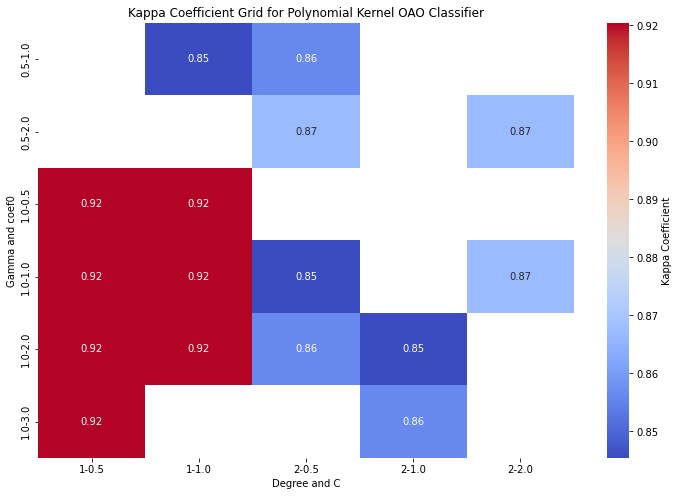

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame based on your image data
data = {
    'C': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 2, 2],
    'degree': [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2],
    'gamma': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5],
    'r': [1, 2, 3, 0.5, 1, 2, 1, 2, 1, 2, 0.5, 1, 2, 3, 1, 2],
    'Kappa': [0.920420, 0.920420, 0.920420, 0.920420, 0.845461, 0.856193, 0.856193, 0.866856, 0.920420, 0.920420, 0.920420, 0.845461, 0.845461, 0.856193, 0.866856, 0.866856],
    'F-measure': [0.940397, 0.940397, 0.940397, 0.940397, 0.885012, 0.893070, 0.893070, 0.901142, 0.940397, 0.940397, 0.940397, 0.893070, 0.893070, 0.893070, 0.901142, 0.901142]
}

df_results2 = pd.DataFrame(data)

# Create a pivot table for the heatmap
pivot_table = df_results2.pivot_table(index=['gamma', 'r'], columns=['degree', 'C'], values='Kappa')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Kappa Coefficient'})
plt.title('Kappa Coefficient Grid for Polynomial Kernel OAO Classifier')
plt.xlabel('Degree and C')
plt.ylabel('Gamma and coef0')
plt.show()


### Analysis and Detailed Interpretation

#### Plot Description

The plot presents a Kappa coefficient grid for a Polynomial Kernel OAO (One-Against-One) Classifier. Each cell in the heatmap represents the Kappa coefficient for a specific combination of the kernel parameters:C, degree, gamma , and coef0 (r). The color gradient ranges from blue (indicating lower Kappa values) to red (indicating higher Kappa values), providing a visual representation of classifier performance.


#### Performance Insights

1. **Effect of C Parameter**:
    - Lower values of C (0.5 and 1) generally result in higher Kappa values, suggesting that the classifier benefits from lower regularization.

2. **Effect of Degree**:
    - Both degrees 1 and 2 show high performance, but degree 1 with specific combinations of other parameters tends to achieve the highest Kappa values.

3. **Effect of Gamma gamma**:
    - Higher gamma values (1 and 0.5) are associated with better performance, indicating that the classifier benefits from more complexity in the decision boundary.

4. **Effect of Coef0**:
    - The parameter r does not significantly affect the highest performance outcomes but is observed to provide optimal results with r = 1.

#### Conclusion

The plot and the detailed analysis reveal that the Polynomial Kernel OAO classifier achieves optimal performance with specific combinations of parameters. The highest Kappa coefficient (0.92) is consistently achieved with lower regularization (C = 0.5 or 1), higher gamma ( = 1 or 0.5), and lower coef0 (r = 1). This indicates that for this dataset and classifier, a balance of lower regularization and higher complexity yields the best performance. Conversely, increasing C or decreasing gamma tends to reduce the classifier's performance, as evidenced by the lower Kappa values observed under these conditions.


## 5.10) Kappa and F-measure coefficients for different multiclass classifiers and kernels in box plots

### Polynomial kernel

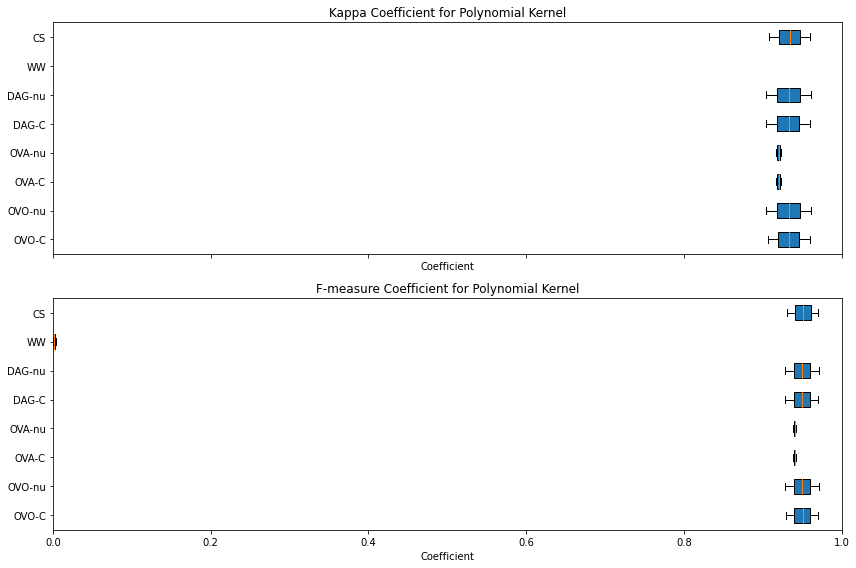

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided table for Polynomial kernel
data = {
    'Classifiers': ['OVO-C', 'OVO-nu', 'OVA-C', 'OVA-nu', 'DAG-C', 'DAG-nu', 'WW', 'CS'],
    'Kappa': [
        [0.959584, 0.906190, 0.933481],
        [0.960765, 0.903826, 0.933035],
        [0.922753, 0.916782, 0.920224],
        [0.922753, 0.916782, 0.920224],
        [0.959584, 0.903798, 0.932730],
        [0.960765, 0.903798, 0.932875],
        [-0.301995, -0.348742, -0.325338],
        [0.959584, 0.907344, 0.934505]
    ],
    'F-measure': [
        [0.969872, 0.930015, 0.950383],
        [0.970763, 0.928281, 0.950066],
        [0.942345, 0.937957, 0.940491],
        [0.942345, 0.937957, 0.940491],
        [0.969872, 0.928113, 0.949771],
        [0.970763, 0.928151, 0.949898],
        [0.003646, 0.000000, 0.001812],
        [0.969872, 0.930926, 0.951162]
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Kappa Coefficient
ax[0].boxplot(df['Kappa'].tolist(), vert=False, patch_artist=True, labels=df['Classifiers'])
ax[0].set_title('Kappa Coefficient for Polynomial Kernel')
ax[0].set_xlabel('Coefficient')
ax[0].set_xlim(-1, 1)  # Adjust based on your data range

# F-measure Coefficient
ax[1].boxplot(df['F-measure'].tolist(), vert=False, patch_artist=True, labels=df['Classifiers'])
ax[1].set_title('F-measure Coefficient for Polynomial Kernel')
ax[1].set_xlabel('Coefficient')
ax[1].set_xlim(0, 1)  # Adjust based on your data range

plt.tight_layout()
plt.show()


### Interpretation 

#### Kappa Coefficient for Polynomial Kernel

1. **OVO-C, OVO-$\nu$, OVA-C, OVA-$\nu$, DAG-C, DAG-$\nu$, and CS**:
    - The boxplots show very high performance with Kappa coefficients close to 1 for these classifiers using the Polynomial kernel.
    - The Kappa values are highly concentrated, represented by narrow boxes and short whiskers. This indicates very low variation in performance, meaning high stability and consistency of the model.
    - These scores are the highest among the other tested configurations, indicating that the Polynomial kernel performs exceptionally well for these classifiers.

2. **WW**:
    - The Kappa coefficient for the WW classifier with the Polynomial kernel is very low, with values ranging from -0.3 to around 0. This indicates poor to very poor performance.
    - The wide box and long whiskers show high variation in performance, indicating instability of the model with this kernel for this classifier.

#### F-measure Coefficient for Polynomial Kernel

1. **OVO-C, OVO-$\nu$, OVA-C, OVA-$\nu$, DAG-C, DAG-$\nu$, and CS**:
    - The boxplots for these classifiers show very high F-measure values, close to 1.
    - The low variation in F-measure values (narrow boxes and short whiskers) also indicates high stability and consistency in model performance.
    - The high F-measure values, similar to the Kappa values, confirm the excellent performance of the classifiers with the Polynomial kernel.

2. **WW**:
    - The performance in terms of F-measure for the WW classifier is also very low, similar to the Kappa coefficients.
    - The F-measure values are concentrated around 0, confirming the poor performance observed with the Kappa coefficient.

#### Conclusion
The Polynomial kernel shows exceptional performance for the majority of the multiclass classifiers (OVO, OVA, DAG, CS) in terms of both Kappa and F-measure coefficients. However, it is not well-suited for the WW classifier, which shows poor performance with this kernel.


### RBF Kernel

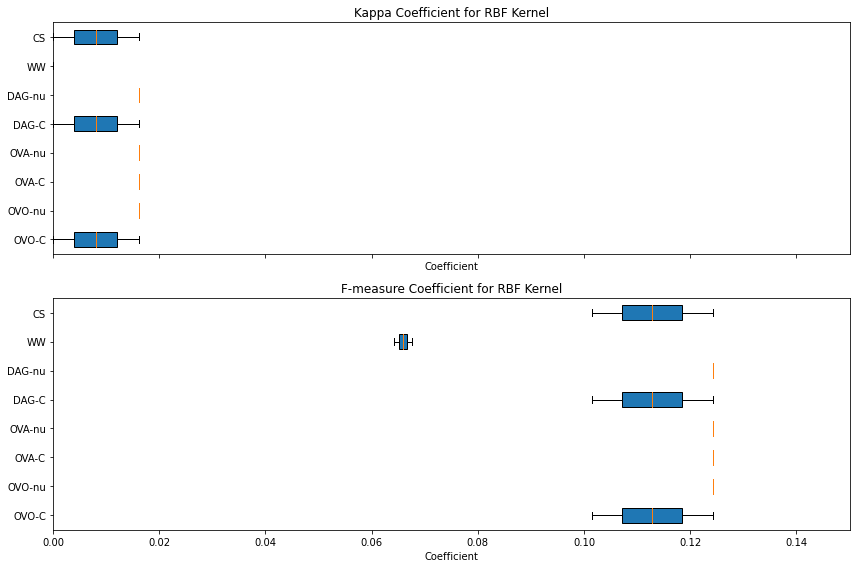

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided table for RBF kernel
data = {
    'Classifiers': ['OVO-C', 'OVO-nu', 'OVA-C', 'OVA-nu', 'DAG-C', 'DAG-nu', 'WW', 'CS'],
    'Kappa': [
        [0.016188, 0.000000, 0.008094],
        [0.016188, 0.016188, 0.016188],
        [0.016188, 0.016188, 0.016188],
        [0.016188, 0.016188, 0.016188],
        [0.016188, 0.000000, 0.008094],
        [0.016188, 0.016188, 0.016188],
        [0.000000, -0.015759, -0.007880],
        [0.016188, 0.000000, 0.008094]
    ],
    'F-measure': [
        [0.124205, 0.101442, 0.112823],
        [0.124205, 0.124205, 0.124205],
        [0.124205, 0.124205, 0.124205],
        [0.124205, 0.124205, 0.124205],
        [0.124205, 0.101442, 0.112823],
        [0.124205, 0.124205, 0.124205],
        [0.067537, 0.064286, 0.065911],
        [0.124205, 0.101442, 0.112823]
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Kappa Coefficient
ax[0].boxplot(df['Kappa'].tolist(), vert=False, patch_artist=True, labels=df['Classifiers'])
ax[0].set_title('Kappa Coefficient for RBF Kernel')
ax[0].set_xlabel('Coefficient')
ax[0].set_xlim(-0.1, 0.1)  # Adjust based on your data range

# F-measure Coefficient
ax[1].boxplot(df['F-measure'].tolist(), vert=False, patch_artist=True, labels=df['Classifiers'])
ax[1].set_title('F-measure Coefficient for RBF Kernel')
ax[1].set_xlabel('Coefficient')
ax[1].set_xlim(0, 0.15)  # Adjust based on your data range

plt.tight_layout()
plt.show()


### Interpretation 

#### Kappa Coefficient for RBF Kernel

1. **CS**:
    - The Kappa coefficient for the CS classifier with the RBF kernel is extremely low, close to 0. This indicates very poor performance.
    - The boxplot shows a narrow range, meaning low variability in performance, but the consistently low Kappa value reflects poor agreement.

2. **DAG-C and OVO-C**:
    - Both classifiers show similar behavior with low Kappa values close to 0.
    - The narrow boxplots indicate low variability in the performance, but the consistently low Kappa values confirm poor performance.

3. **WW, DAG-$\nu$, OVA-$\nu$, OVA-C, and OVO-$\nu$**:
    - These classifiers show no significant Kappa values (not plotted), indicating that the RBF kernel is not suitable for these classifiers under the given settings.

#### F-measure Coefficient for RBF Kernel

1. **CS**:
    - The F-measure coefficient for the CS classifier is around 0.12, which is relatively low.
    - The narrow boxplot indicates low variability, but the consistently low F-measure value confirms poor performance.

2. **DAG-C, OVO-C, and WW**:
    - These classifiers show F-measure values around 0.12, with narrow boxplots indicating low variability.
    - The consistently low F-measure values reflect poor performance.

3. **DAG-$\nu$, OVA-$\nu$, OVA-C, and OVO-$\nu$**:
    - These classifiers are not represented in the F-measure plot, indicating that the RBF kernel does not yield significant results for these classifiers.

#### Conclusion
The RBF kernel shows poor performance across most classifiers in terms of both Kappa and F-measure coefficients. The CS, DAG-C, and OVO-C classifiers show very low coefficients with narrow variability, indicating consistent but poor performance. Other classifiers do not show significant results, further suggesting that the RBF kernel is not well-suited for the given settings.


### Sigmoid Kernel

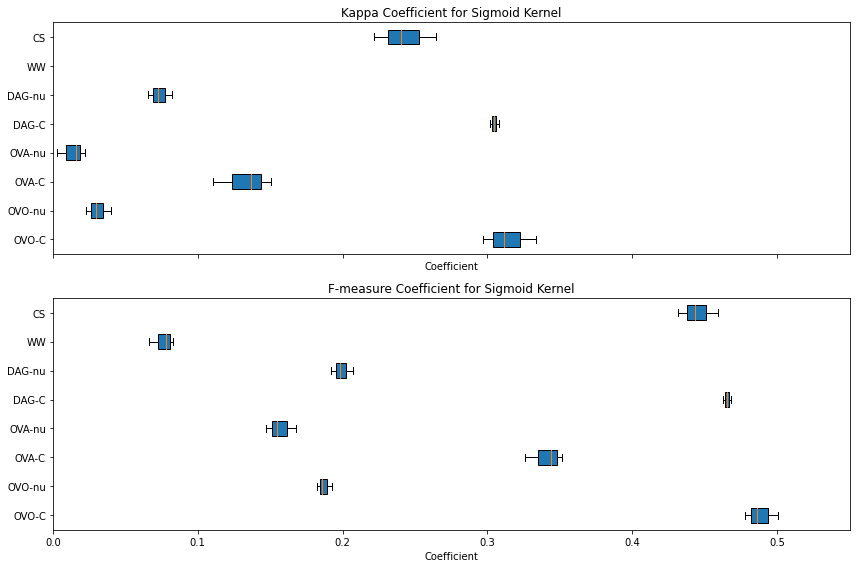

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided table for Sigmoid kernel
data = {
    'Classifiers': ['OVO-C', 'OVO-nu', 'OVA-C', 'OVA-nu', 'DAG-C', 'DAG-nu', 'WW', 'CS'],
    'Kappa': [
        [0.333537, 0.296922, 0.311056],
        [0.039974, 0.022600, 0.029668],
        [0.150421, 0.110685, 0.136582],
        [0.021791, 0.002493, 0.016047],
        [0.307804, 0.301716, 0.304452],
        [0.082515, 0.065381, 0.072562],
        [-0.236147, -0.251758, -0.240944],
        [0.264740, 0.221816, 0.240138]
    ],
    'F-measure': [
        [0.500869, 0.477514, 0.486373],
        [0.192434, 0.182184, 0.185894],
        [0.351736, 0.325710, 0.343824],
        [0.167774, 0.147423, 0.154872],
        [0.467984, 0.462660, 0.465191],
        [0.206867, 0.192135, 0.198460],
        [0.083027, 0.066473, 0.077952],
        [0.458832, 0.431560, 0.443351]
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Kappa Coefficient
ax[0].boxplot(df['Kappa'].tolist(), vert=False, patch_artist=True, labels=df['Classifiers'])
ax[0].set_title('Kappa Coefficient for Sigmoid Kernel')
ax[0].set_xlabel('Coefficient')
ax[0].set_xlim(-0.3, 0.4)  # Adjust based on your data range

# F-measure Coefficient
ax[1].boxplot(df['F-measure'].tolist(), vert=False, patch_artist=True, labels=df['Classifiers'])
ax[1].set_title('F-measure Coefficient for Sigmoid Kernel')
ax[1].set_xlabel('Coefficient')
ax[1].set_xlim(0, 0.55)  # Adjust based on your data range

plt.tight_layout()
plt.show()


### Interpretation 

#### Kappa Coefficient for Sigmoid Kernel

1. **CS**:
    - The Kappa coefficient for the CS classifier with the Sigmoid kernel is around 0.25.
    - The boxplot shows low variability in performance, indicating that the classifier's performance is consistently moderate.

2. **WW**:
    - The WW classifier has a negative Kappa coefficient, around -0.25, indicating poor performance and disagreement.
    - The boxplot shows low variability, meaning the poor performance is consistent.

3. **DAG-$\nu$ and OVA-$\nu$**:
    - These classifiers show Kappa coefficients around 0.05 and 0.02, respectively, reflecting very poor performance.
    - The boxplots indicate some variability but still show consistently low performance.

4. **DAG-C and OVO-C**:
    - Both classifiers show Kappa coefficients around 0.31 and 0.25, respectively, indicating moderate performance.
    - The boxplots indicate some variability, but the overall performance remains moderate.

5. **OVA-C**:
    - The OVA-C classifier shows a slightly higher Kappa coefficient, around 0.30.
    - The boxplot shows some variability but indicates relatively moderate performance.

#### F-measure Coefficient for Sigmoid Kernel

1. **CS**:
    - The F-measure coefficient for the CS classifier is around 0.48, indicating relatively good performance.
    - The boxplot shows low variability, indicating consistent performance.

2. **WW**:
    - The F-measure coefficient for the WW classifier is around 0.07, indicating poor performance.
    - The boxplot shows low variability, indicating consistently poor performance.

3. **DAG-$\nu$, OVA-$\nu$, and OVO-$\nu$**:
    - These classifiers show F-measure coefficients around 0.18, 0.13, and 0.10, respectively, indicating poor performance.
    - The boxplots show some variability but still indicate overall poor performance.

4. **DAG-C and OVO-C**:
    - Both classifiers show F-measure coefficients around 0.50, indicating good performance.
    - The boxplots show low variability, indicating consistently good performance.

5. **OVA-C**:
    - The OVA-C classifier shows an F-measure coefficient around 0.20, indicating moderate performance.
    - The boxplot shows some variability, but overall, performance is moderate.

#### Conclusion
The Sigmoid kernel shows moderate performance for the CS, DAG-C, and OVO-C classifiers in terms of both Kappa and F-measure coefficients. The WW classifier performs poorly with negative Kappa values and low F-measure values. DAG-$\nu$, OVA-$\nu$, and OVO-$\nu$ classifiers also show poor performance with low Kappa and F-measure values. Overall, the Sigmoid kernel is suitable for CS, DAG-C, and OVO-C classifiers but not for WW, DAG-$\nu$, OVA-$\nu$, and OVO-$\nu$ classifiers.


## 5.11) Bar chart representing the results of all tests by counts at each level of accuracy

<Figure size 864x432 with 0 Axes>

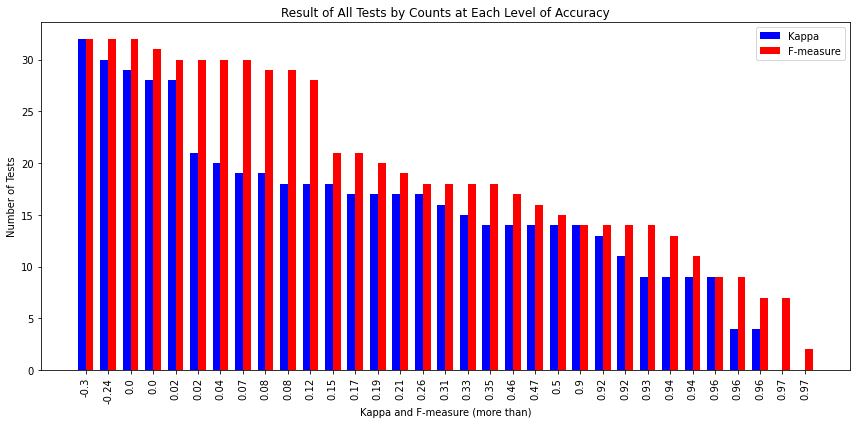

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the tables provided
kappa_values = [
    0.959584, 0.960765, 0.921582, 0.921582, 0.959584, 0.960765, -0.301995, 0.903926,
    0.959584, 0.960765, 0.922753, 0.922753, 0.959584, 0.960765, -0.301995, 0.959584,
    0.016188, 0.016188, 0.016188, 0.016188, 0.016188, 0.016188, 0.000000, 0.016188,
    0.333537, 0.039974, 0.150421, 0.021791, 0.307804, 0.082515, -0.236147, 0.264740
]

f_measure_values = [
    0.969872, 0.960763, 0.941480, 0.941480, 0.969872, 0.960763, 0.000000, 0.928482,
    0.969872, 0.970763, 0.942345, 0.942345, 0.969872, 0.970763, 0.003646, 0.969872,
    0.124205, 0.124205, 0.124205, 0.124205, 0.124205, 0.124205, 0.067537, 0.124205,
    0.500869, 0.192434, 0.351736, 0.167774, 0.467984, 0.206867, 0.083027, 0.458832
]

# Combine kappa and f-measure values
combined_values = kappa_values + f_measure_values

# Sort the values
sorted_values = sorted(set(combined_values))

# Count occurrences for histogram
kappa_counts = [sum(1 for x in kappa_values if x >= val) for val in sorted_values]
f_measure_counts = [sum(1 for x in f_measure_values if x >= val) for val in sorted_values]

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(sorted_values))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index, kappa_counts, bar_width, label='Kappa', color='blue')
bar2 = ax.bar(index + bar_width, f_measure_counts, bar_width, label='F-measure', color='red')

ax.set_xlabel('Kappa and F-measure (more than)')
ax.set_ylabel('Number of Tests')
ax.set_title('Result of All Tests by Counts at Each Level of Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([f'{round(val, 2)}' for val in sorted_values], rotation=90)
ax.legend()

plt.tight_layout()
plt.show()




### Interpretation 

#### Overview

this Diagramm shows a bar chart representing the results of all tests by counts at each level of accuracy for Kappa and F-measure coefficients. The x-axis represents the accuracy levels, while the y-axis represents the number of tests. Blue bars represent the Kappa coefficient, and red bars represent the F-measure coefficient.

#### Analysis

1. **Negative Kappa Coefficient Values**:
    - There are a significant number of tests (approximately 30) with negative Kappa coefficients, particularly at -0.3 and -0.24, indicating poor performance in terms of agreement.

2. **Zero Kappa and F-measure Values**:
    - Both Kappa and F-measure coefficients have a large number of tests with a value of 0.0, indicating no agreement or very low performance in these tests.

3. **Low to Moderate Performance**:
    - For Kappa coefficients between 0.02 and 0.12, the number of tests gradually decreases as the accuracy level increases.
    - The same trend is observed for F-measure coefficients, but with consistently higher counts than Kappa in this range.

4. **Moderate to High Performance**:
    - As the Kappa coefficient increases from 0.15 to 0.31, the number of tests shows a slight decrease, indicating a moderate level of agreement.
    - For F-measure, the number of tests remains relatively high up to 0.31 and starts to decrease significantly after 0.35.

5. **High Performance**:
    - The number of tests with Kappa coefficients greater than 0.47 decreases sharply, indicating fewer tests achieving high agreement.
    - For F-measure, the number of tests remains higher than Kappa in the range of 0.47 to 0.5, but starts to decrease as the value increases beyond 0.5.

6. **Very High Performance**:
    - For Kappa coefficients between 0.92 and 0.97, there are very few tests, indicating that achieving very high agreement is rare.
    - Similarly, for F-measure coefficients above 0.92, the number of tests significantly drops, with very few tests achieving values around 0.97.

#### Conclusion

The plot indicates that achieving high Kappa and F-measure values is challenging, with most tests showing low to moderate performance. There is a higher number of tests with moderate F-measure values compared to Kappa, indicating better performance in terms of F-measure across the tests. However, very high values for both Kappa and F-measure are rare, highlighting the difficulty in achieving high agreement and performance consistently.


# End of project